In [1]:
import numpy as np
from numpy import exp, loadtxt, pi, sqrt
from scipy import stats
from scipy.stats import binned_statistic 
from astropy.table import Table, Column, MaskedColumn
import math
import matplotlib.pyplot as plt
import pylab
from astropy.io import ascii
import pickle
import pandas as pd
import os.path
from numpy import exp, loadtxt, pi, sqrt
from scipy.stats import ks_2samp
import array
import matplotlib
import time
from matplotlib import ticker, cm

In [2]:
def am(val):
    return (val[1:]+val[:-1])/2

from scipy import interpolate
def confidence_intervals(z,dx=1,dy=1):
    """
    takes normalised probability distribution as input (fi dx,dy=1 then probdist=n/Ntotal)
    outputs the level of the contour at which 75% 50% and 25%
    """
    n = 20
    t = np.linspace(0, z.max(), n)
    integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2)) *dx*dy
    f = interpolate.interp1d(integral, t)
    t_contours = f(np.array([0.95,0.68,0.40]))
    return np.append(t_contours,1)

In [3]:
def easyplot(valx,valy,valp,edgex,edgey,lrview=True,predview=True):
    alpha=0.26
    if lrview ==True:
        lvl = confidence_intervals(valx.T/valx.sum())
        ax.contourf(edgex,edgey,valx.T/valx.sum(),colors=colorp,levels=lvl,alpha=alpha)
        c1 = ax.contour(edgex,edgey,valx.T/valx.sum(),levels=lvl,colors=colorpp,linewidths=3)
        h1,l1 = c1.legend_elements()
    else:
        h1=None
    lvl = confidence_intervals(valy.T/valy.sum())
    ax.contourf(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloroo,alpha=alpha)
    c2 = ax.contour(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloro,linewidths=3)
    h2,l1 = c2.legend_elements()
    if predview == True:
        lvl = confidence_intervals(valp.T/valp.sum())
        CS = ax.contour(edgex,edgey,valp.T/valp.sum(),levels=lvl,colors=colorb,linewidths=4,linestyles='dashed')
        h3,l3 = CS.legend_elements()
        for c in CS.collections:
            c.set_dashes([(1,(3.0,3.0))])
    else:
        h3=None
    return h1,h2,h3

In [22]:
from haloscope import ConditionalMultiVariateGaussian 

In [5]:
font1 = {'color':  'red',
        'weight': 'normal',
        'size': 13,
        }
font2 = {'color':  'darkmagenta',
        'weight': 'normal',
        'size': 13,
        }
font3 = {'color':  'darkgreen',
        'weight': 'normal',
        'size': 13,
        }
font4 = {'color':  'black',
        'weight': 'normal',
        'size': 12.5,
        }

# READ data

## ASTRID

In [6]:
path = '../Data/Rockstar/Astrid/L25n256/CV/CV_'
pd.read_table(path + '0/hlists/hlist_1.00000.list', sep='\s+').columns

Index(['#scale(0)', 'id(1)', 'desc_scale(2)', 'desc_id(3)', 'num_prog(4)',
       'pid(5)', 'upid(6)', 'desc_pid(7)', 'phantom(8)', 'sam_Mvir(9)',
       'Mvir(10)', 'Rvir(11)', 'rs(12)', 'vrms(13)', 'mmp?(14)',
       'scale_of_last_MM(15)', 'vmax(16)', 'x(17)', 'y(18)', 'z(19)', 'vx(20)',
       'vy(21)', 'vz(22)', 'Jx(23)', 'Jy(24)', 'Jz(25)', 'Spin(26)',
       'Breadth_first_ID(27)', 'Depth_first_ID(28)', 'Tree_root_ID(29)',
       'Orig_halo_ID(30)', 'Snap_idx(31)',
       'Next_coprogenitor_depthfirst_ID(32)',
       'Last_progenitor_depthfirst_ID(33)', 'Last_mainleaf_depthfirst_ID(34)',
       'Tidal_Force(35)', 'Tidal_ID(36)', 'Rs_Klypin(37)', 'Mvir_all(38)',
       'M200b(39)', 'M200c(40)', 'M500c(41)', 'M2500c(42)', 'Xoff(43)',
       'Voff(44)', 'Spin_Bullock(45)', 'b_to_a(46)', 'c_to_a(47)', 'A[x](48)',
       'A[y](49)', 'A[z](50)', 'b_to_a(500c)(51)', 'c_to_a(500c)(52)',
       'A[x](500c)(53)', 'A[y](500c)(54)', 'A[z](500c)(55)', 'T/|U|(56)',
       'M_pe_Behroozi(57)',

In [51]:
nsim = 27
lista_columns = ['id','pid','Rvir','Spin','Rs_Klypin','M200b','ba','ca','ba500c','ca500c','T_U','Vpeak','TidalForce'] 

path = '../Data/Rockstar/Astrid/L25n256/CV/CV_'
for i in range(nsim):
    if (i == 0):
        Astrid_data_bar = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,63,81), low_memory=False)
    if (i > 0) & (i != 8): 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,63,81), low_memory=False)
        Astrid_data_bar = pd.concat([Astrid_data_bar, data_aux])
  

cv = Astrid_data_bar.Rvir / Astrid_data_bar.Rs_Klypin
Astrid_data_bar.insert(9,'cv', cv)
Astrid_data_bar

id  pid     Rvir     Spin  Rs_Klypin           M200b       ba  \
0     900126   -1  755.708  0.01619  100.88300  56390000000000  0.71603   
1     900240   -1  598.937  0.02747  123.80400  28280000000000  0.61954   
2     904251   -1  593.485  0.09882  117.86100  27431000000000  0.65766   
3     904212   -1  566.236  0.02464   70.29040  24817000000000  0.60690   
4     897494   -1  551.313  0.04683   63.93480  21587000000000  0.53750   
...      ...  ...      ...      ...        ...             ...      ...   
6997  925351   -1   10.334  0.00000    2.47929       129760000  0.00000   
6998  926645   -1   10.334  0.00000    2.36318       583930000  0.00000   
6999  931474   -1   10.334  0.00000    3.26225       259520000  0.00000   
7000  932881   -1   10.334  0.00000    1.17676      2775700000  0.00000   
7001  932953   -1   10.334  0.00000    1.68910      2827900000  0.00000   

           ca   ba500c        cv   ca500c     T_U         Vpeak  TidalForce  
0     0.44611  0.66172  7.490935  0.42536  0.5696  5.074000e+13     0.00000  
1     0.50558  0.58238  4.837784  0.47910  0.5692  2.526000e+13     0.00000  
2     0.48063  0.62263  5.035466  0.50743  0.6636  2.458000e+13     0.11787  
3     0.51821  0.56894  8.055666  0.47420  0.5499  2.135000e+13     0.35957  
4     0.45687  0.49806  8.623050  0.39415  0.6250  1.970000e+13     0.11206  
...       ...      ...       ...      ...     ...           ...         ...  
6997  0.00000  0.00000  4.168129  0.00000  0.0000  1.298000e+08     0.24064  
6998  0.00000  0.00000  4.372921  0.00000  0.0000  1.298000e+08     0.19094  
6999  0.00000  0.00000  3.167752  0.00000  0.0000  1.298000e+08     0.42988  
7000  0.00000  0.00000  8.781740  0.00000  0.0000  1.298000e+08     0.39616  
7001  0.00000  0.00000  6.118051  0.00000  0.0000  1.298000e+08     0.63694  

[177390 rows x 14 columns]

In [52]:
path = '../Data/Rockstar/Astrid_DM/L25n256/CV/CV_'
pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', sep='\s+').columns

Index(['#scale(0)', 'id(1)', 'desc_scale(2)', 'desc_id(3)', 'num_prog(4)',
       'pid(5)', 'upid(6)', 'desc_pid(7)', 'phantom(8)', 'sam_Mvir(9)',
       'Mvir(10)', 'Rvir(11)', 'rs(12)', 'vrms(13)', 'mmp?(14)',
       'scale_of_last_MM(15)', 'vmax(16)', 'x(17)', 'y(18)', 'z(19)', 'vx(20)',
       'vy(21)', 'vz(22)', 'Jx(23)', 'Jy(24)', 'Jz(25)', 'Spin(26)',
       'Breadth_first_ID(27)', 'Depth_first_ID(28)', 'Tree_root_ID(29)',
       'Orig_halo_ID(30)', 'Snap_idx(31)',
       'Next_coprogenitor_depthfirst_ID(32)',
       'Last_progenitor_depthfirst_ID(33)', 'Last_mainleaf_depthfirst_ID(34)',
       'Tidal_Force(35)', 'Tidal_ID(36)', 'Rs_Klypin(37)', 'Mvir_all(38)',
       'M200b(39)', 'M200c(40)', 'M500c(41)', 'M2500c(42)', 'Xoff(43)',
       'Voff(44)', 'Spin_Bullock(45)', 'b_to_a(46)', 'c_to_a(47)', 'A[x](48)',
       'A[y](49)', 'A[z](50)', 'b_to_a(500c)(51)', 'c_to_a(500c)(52)',
       'A[x](500c)(53)', 'A[y](500c)(54)', 'A[z](500c)(55)', 'T/|U|(56)',
       'M_pe_Behroozi(57)',

In [61]:

for i in range(nsim):
    if i == 0:
        Astrid_data_dm = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,63,78), low_memory=False)
    if i > 0 & (i != 8): 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,63,78), low_memory=False)
        Astrid_data_dm = pd.concat([Astrid_data_dm, data_aux])
  

cv = Astrid_data_dm.Rvir / Astrid_data_dm.Rs_Klypin
Astrid_data_dm.insert(9,'cv', cv)
M200b_02dex_log = 10.**(np.log10(Astrid_data_dm.M200b)-0.1)
Astrid_data_dm.insert(6,'M200b02d', M200b_02dex_log)
Astrid_data_dm

id     pid     Rvir     Spin  Rs_Klypin           M200b  \
0     691702      -1  753.639  0.01984   80.45650  54821000000000   
1     692384      -1  605.162  0.02465   89.79320  28508000000000   
2     695467      -1  599.448  0.09857  110.76000  27406000000000   
3     695630      -1  574.542  0.02356   55.40720  25311000000000   
4     689662      -1  568.311  0.04274   51.51310  22619000000000   
...      ...     ...      ...      ...        ...             ...   
7372  711332  708734   18.753  0.11381    0.52776       853010000   
7373  710703      -1   18.106  0.14556    6.32030      1318300000   
7374  708690      -1   17.409  0.46150    2.61968       853010000   
7375  708587      -1   15.817  0.35304    1.12415      1473400000   
7376  708613      -1   14.885  0.32335    1.40767       465280000   

          M200b02d       ba       ca   ba500c         cv   ca500c     T_U  \
0     4.354587e+13  0.69911  0.42585  0.65934   9.367037  0.42504  0.6107   
1     2.264471e+13  0.59885  0.48451  0.52785   6.739508  0.45574  0.6022   
2     2.176936e+13  0.66712  0.44796  0.53508   5.412134  0.49556  0.6834   
3     2.010524e+13  0.55621  0.48302  0.51992  10.369447  0.44616  0.5849   
4     1.796691e+13  0.52233  0.50317  0.49328  11.032359  0.47158  0.6427   
...            ...      ...      ...      ...        ...      ...     ...   
7372  6.775699e+08  0.09691  0.02603  0.06397  35.533197  0.02806  1.3572   
7373  1.047163e+09  0.26049  0.06952  0.00000   2.864737  0.00000  2.0908   
7374  6.775699e+08  0.84240  0.21756  0.00000   6.645468  0.00000  3.6688   
7375  1.170363e+09  0.08329  0.00000  0.00000  14.070186  0.00000  3.8235   
7376  3.695850e+08  0.12061  0.00000  0.00000  10.574211  0.00000  5.3068   

       Vpeak  TidalForce  
0     684.72     0.00000  
1     565.59     0.00000  
2     499.16     0.18681  
3     530.65     0.29555  
4     508.21     0.08503  
...      ...         ...  
7372   36.26     1.43652  
7373   40.68     1.32153  
7374   44.16     1.37566  
7375   26.64     1.32214  
7376   12.92     0.98051  

[197248 rows x 15 columns]

## TNG

In [10]:
path = '../Data/Rockstar/IllustrisTNG/L25n256/CV/CV_'
pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', sep='\s+').columns

Index(['#scale(0)', 'id(1)', 'desc_scale(2)', 'desc_id(3)', 'num_prog(4)',
       'pid(5)', 'upid(6)', 'desc_pid(7)', 'phantom(8)', 'sam_Mvir(9)',
       'Mvir(10)', 'Rvir(11)', 'rs(12)', 'vrms(13)', 'mmp?(14)',
       'scale_of_last_MM(15)', 'vmax(16)', 'x(17)', 'y(18)', 'z(19)', 'vx(20)',
       'vy(21)', 'vz(22)', 'Jx(23)', 'Jy(24)', 'Jz(25)', 'Spin(26)',
       'Breadth_first_ID(27)', 'Depth_first_ID(28)', 'Tree_root_ID(29)',
       'Orig_halo_ID(30)', 'Snap_idx(31)',
       'Next_coprogenitor_depthfirst_ID(32)',
       'Last_progenitor_depthfirst_ID(33)', 'Last_mainleaf_depthfirst_ID(34)',
       'Tidal_Force(35)', 'Tidal_ID(36)', 'Rs_Klypin(37)', 'Mvir_all(38)',
       'M200b(39)', 'M200c(40)', 'M500c(41)', 'M2500c(42)', 'Xoff(43)',
       'Voff(44)', 'Spin_Bullock(45)', 'b_to_a(46)', 'c_to_a(47)', 'A[x](48)',
       'A[y](49)', 'A[z](50)', 'b_to_a(500c)(51)', 'c_to_a(500c)(52)',
       'A[x](500c)(53)', 'A[y](500c)(54)', 'A[z](500c)(55)', 'T/|U|(56)',
       'M_pe_Behroozi(57)',

In [11]:
nsim = 27
lista_columns = ['id','pid','Rvir','Spin','Rs_Klypin','M200b','ba','ca','ba500c','ca500c','T_U','Vpeak','TidalForce'] 

path = '../Data/Rockstar/IllustrisTNG/L25n256/CV/CV_'

for i in range(nsim):
    if i == 0:
        Illustris_data_bar = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,66,81), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,66,81), low_memory=False)
        Illustris_data_bar = pd.concat([Illustris_data_bar, data_aux])
  

cv = Illustris_data_bar.Rvir / Illustris_data_bar.Rs_Klypin
Illustris_data_bar.insert(9,'cv', cv)
Illustris_data_bar

id  pid     Rvir     Spin  Rs_Klypin           M200b       ba  \
0     344582   -1  761.179  0.01576  108.21300  57599000000000  0.70149   
1     344705   -1  592.586  0.02655  117.58700  27568000000000  0.85064   
2     348606   -1  589.585  0.09712  117.70500  26475000000000  0.56102   
3     348588   -1  553.399  0.02610   69.91930  23552000000000  0.60733   
4     343262   -1  550.248  0.01791   37.00850  22924000000000  0.71073   
...      ...  ...      ...      ...        ...             ...      ...   
6857  359728   -1   11.830  0.02716    0.64873      3828000000  0.00000   
6858  359426   -1   10.666  0.66985    0.69526     10951000000  0.00000   
6859  355962   -1   10.334  0.00000    0.74380       202260000  0.00000   
6860  356573   -1   10.334  0.00000    3.38284       259520000  0.00000   
6861  360781   -1   10.334  0.00000    2.64982       129760000  0.00000   

           ca   ba500c         cv   ca500c     T_U   Vpeak  TidalForce  
0     0.44993  0.66518   7.034081  0.43560  0.5670  661.41     0.00000  
1     0.63682  0.73052   5.039554  0.55627  0.5810  503.76     0.00000  
2     0.39976  0.49704   5.009006  0.40053  0.6748  445.41     0.07410  
3     0.51191  0.58078   7.914825  0.47700  0.5717  488.02     0.39902  
4     0.66767  0.71648  14.868152  0.66056  0.5459  540.42     0.01230  
...       ...      ...        ...      ...     ...     ...         ...  
6857  0.00000  0.00000  18.235630  0.00000  0.3845   11.79     0.34484  
6858  0.00000  0.00000  15.341024  0.00000  5.0693   10.14     0.20836  
6859  0.00000  0.00000  13.893520  0.00000  0.0000    9.58     0.20881  
6860  0.00000  0.00000   3.054830  0.00000  0.0000    7.46     0.25238  
6861  0.00000  0.00000   3.899888  0.00000  0.0000    9.08     0.43841  

[182188 rows x 14 columns]

In [12]:
path = '../Data/Rockstar/IllustrisTNG_DM/L25n256/CV/CV_'
pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', sep='\s+').columns

Index(['#scale(0)', 'id(1)', 'desc_scale(2)', 'desc_id(3)', 'num_prog(4)',
       'pid(5)', 'upid(6)', 'desc_pid(7)', 'phantom(8)', 'sam_Mvir(9)',
       'Mvir(10)', 'Rvir(11)', 'rs(12)', 'vrms(13)', 'mmp?(14)',
       'scale_of_last_MM(15)', 'vmax(16)', 'x(17)', 'y(18)', 'z(19)', 'vx(20)',
       'vy(21)', 'vz(22)', 'Jx(23)', 'Jy(24)', 'Jz(25)', 'Spin(26)',
       'Breadth_first_ID(27)', 'Depth_first_ID(28)', 'Tree_root_ID(29)',
       'Orig_halo_ID(30)', 'Snap_idx(31)',
       'Next_coprogenitor_depthfirst_ID(32)',
       'Last_progenitor_depthfirst_ID(33)', 'Last_mainleaf_depthfirst_ID(34)',
       'Tidal_Force(35)', 'Tidal_ID(36)', 'Rs_Klypin(37)', 'Mvir_all(38)',
       'M200b(39)', 'M200c(40)', 'M500c(41)', 'M2500c(42)', 'Xoff(43)',
       'Voff(44)', 'Spin_Bullock(45)', 'b_to_a(46)', 'c_to_a(47)', 'A[x](48)',
       'A[y](49)', 'A[z](50)', 'b_to_a(500c)(51)', 'c_to_a(500c)(52)',
       'A[x](500c)(53)', 'A[y](500c)(54)', 'A[z](500c)(55)', 'T/|U|(56)',
       'M_pe_Behroozi(57)',

In [13]:
path = '../Data/Rockstar/IllustrisTNG_DM/L25n256/CV/CV_'
for i in range(nsim):
    if i == 0:
        Illustris_data_dm = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,63,78), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,63,78), low_memory=False)
        Illustris_data_dm = pd.concat([Illustris_data_dm, data_aux])
  

cv = Illustris_data_dm.Rvir / Illustris_data_dm.Rs_Klypin
Illustris_data_dm.insert(9,'cv', cv)
M200b_02dex_log = 10.**(np.log10(Illustris_data_dm.M200b)-0.2)
Illustris_data_dm.insert(6,'M200b02d', M200b_02dex_log)
Illustris_data_dm

id     pid     Rvir     Spin  Rs_Klypin           M200b  \
0     305741      -1  753.539  0.01896   84.70250  54723000000000   
1     306461      -1  604.806  0.02458   89.63340  28440000000000   
2     309555      -1  599.171  0.10019  109.45500  27418000000000   
3     309717      -1  574.011  0.02400   55.56900  25383000000000   
4     303801      -1  568.145  0.04278   50.95240  22592000000000   
...      ...     ...      ...      ...        ...             ...   
7383  317445      -1   19.359  0.03980    0.92893       853010000   
7384  317381  317510   17.409  0.02298    1.46860       620370000   
7385  319255      -1   17.409  0.28103    1.21875       853010000   
7386  315300  315454   16.651  0.34660    4.37046       542830000   
7387  317406      -1   16.651  0.00866    3.87387       542830000   

          M200b02d       ba       ca   ba500c         cv   ca500c     T_U  \
0     3.452788e+13  0.69481  0.42100  0.63980   8.896302  0.40566  0.5993   
1     1.794443e+13  0.60011  0.49157  0.53776   6.747552  0.47619  0.5975   
2     1.729959e+13  0.67742  0.45648  0.55888   5.474131  0.51457  0.6791   
3     1.601559e+13  0.55763  0.47808  0.52083  10.329698  0.43896  0.5799   
4     1.425459e+13  0.52638  0.50137  0.49578  11.150505  0.47999  0.6473   
...            ...      ...      ...      ...        ...      ...     ...   
7383  5.382129e+08  0.70426  0.31840  0.92305  20.840106  0.05390  0.6237   
7384  3.914270e+08  0.03328  0.00016  0.88646  11.854147  0.06240  0.7287   
7385  5.382129e+08  0.66933  0.08259  0.47274  14.284308  0.06581  2.3983   
7386  3.425026e+08  0.85686  0.00205  0.00000   3.809896  0.00000  3.6615   
7387  3.425026e+08  0.02456  0.00000  0.00000   4.298286  0.00000  1.0557   

       Vpeak  TidalForce  
0     684.05     0.00000  
1     565.47     0.00000  
2     473.30     0.22073  
3     525.10     0.25714  
4     499.14     0.09632  
...      ...         ...  
7383   42.94     1.05749  
7384   16.52     1.55128  
7385   16.25     1.37515  
7386   19.44     1.73289  
7387   18.68     1.65011  

[198876 rows x 15 columns]

## SIMBA

In [14]:
path = '../Data/Rockstar/SIMBA/L25n256/CV/CV_'
pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', sep='\s+').columns

Index(['#scale(0)', 'id(1)', 'desc_scale(2)', 'desc_id(3)', 'num_prog(4)',
       'pid(5)', 'upid(6)', 'desc_pid(7)', 'phantom(8)', 'sam_Mvir(9)',
       'Mvir(10)', 'Rvir(11)', 'rs(12)', 'vrms(13)', 'mmp?(14)',
       'scale_of_last_MM(15)', 'vmax(16)', 'x(17)', 'y(18)', 'z(19)', 'vx(20)',
       'vy(21)', 'vz(22)', 'Jx(23)', 'Jy(24)', 'Jz(25)', 'Spin(26)',
       'Breadth_first_ID(27)', 'Depth_first_ID(28)', 'Tree_root_ID(29)',
       'Orig_halo_ID(30)', 'Snap_idx(31)',
       'Next_coprogenitor_depthfirst_ID(32)',
       'Last_progenitor_depthfirst_ID(33)', 'Last_mainleaf_depthfirst_ID(34)',
       'Tidal_Force(35)', 'Tidal_ID(36)', 'Rs_Klypin(37)', 'Mvir_all(38)',
       'M200b(39)', 'M200c(40)', 'M500c(41)', 'M2500c(42)', 'Xoff(43)',
       'Voff(44)', 'Spin_Bullock(45)', 'b_to_a(46)', 'c_to_a(47)', 'A[x](48)',
       'A[y](49)', 'A[z](50)', 'b_to_a(500c)(51)', 'c_to_a(500c)(52)',
       'A[x](500c)(53)', 'A[y](500c)(54)', 'A[z](500c)(55)', 'T/|U|(56)',
       'M_pe_Behroozi(57)',

In [15]:
nsim = 27
lista_columns = ['id','pid','Rvir','Spin','Rs_Klypin','M200b','ba','ca','ba500c','ca500c','T_U','Vpeak','TidalForce'] 

for i in range(nsim):
    if i == 0:
        SIMBA_data_bar = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,66,81), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,66,81), low_memory=False)
        SIMBA_data_bar = pd.concat([SIMBA_data_bar, data_aux])
  

cv = SIMBA_data_bar.Rvir / SIMBA_data_bar.Rs_Klypin
SIMBA_data_bar.insert(9,'cv', cv)
SIMBA_data_bar

id     pid     Rvir     Spin  Rs_Klypin           M200b       ba  \
0     344295      -1  730.277  0.01869  111.33200  51029000000000  0.86191   
1     344378      -1  565.932  0.02785   47.93490  24498000000000  0.80008   
2     347541      -1  562.892  0.08199  114.39400  22997000000000  0.44262   
3     347827      -1  545.513  0.02663   56.77110  22565000000000  0.67059   
4     342746      -1  536.714  0.01490   85.30470  21288000000000  0.57642   
...      ...     ...      ...      ...        ...             ...      ...   
6731  359785  359787   10.334  0.27163    0.37523       129760000  0.00000   
6732  361824      -1   10.334  0.18259    1.81607       389280000  0.00000   
6733  362378      -1   10.334  0.00000    1.70413       583930000  0.00000   
6734  362903  362906   10.334  0.00000    1.91220       129760000  0.00000   
6735  363677      -1   10.334  0.00000    3.83508       519050000  0.00000   

           ca   ba500c         cv   ca500c     T_U   Vpeak  TidalForce  
0     0.51158  0.74518   6.559453  0.45613  0.6161  630.28     0.00000  
1     0.67483  0.84359  11.806262  0.71986  0.5798  515.00     0.00000  
2     0.26124  0.09118   4.920643  0.06965  0.7725  442.50     0.20756  
3     0.56207  0.70153   9.608991  0.58225  0.5744  564.34     0.24087  
4     0.52103  0.48243   6.291728  0.45503  0.5803  478.56     0.01264  
...       ...      ...        ...      ...     ...     ...         ...  
6731  0.00000  0.00000  27.540442  0.00000  0.0000   11.61    16.88875  
6732  0.00000  0.00000   5.690309  0.00000  0.0000   16.05     0.96127  
6733  0.00000  0.00000   6.064091  0.00000  0.0000    8.70     0.23781  
6734  0.00000  0.00000   5.404246  0.00000  0.0000   21.67     3.10620  
6735  0.00000  0.00000   2.694598  0.00000  0.0000    7.76     0.42451  

[177860 rows x 14 columns]

In [16]:
path = '../Data/Rockstar/SIMBA_DM/L25n256/CV/CV_'
pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', sep='\s+').columns

Index(['#scale(0)', 'id(1)', 'desc_scale(2)', 'desc_id(3)', 'num_prog(4)',
       'pid(5)', 'upid(6)', 'desc_pid(7)', 'phantom(8)', 'sam_Mvir(9)',
       'Mvir(10)', 'Rvir(11)', 'rs(12)', 'vrms(13)', 'mmp?(14)',
       'scale_of_last_MM(15)', 'vmax(16)', 'x(17)', 'y(18)', 'z(19)', 'vx(20)',
       'vy(21)', 'vz(22)', 'Jx(23)', 'Jy(24)', 'Jz(25)', 'Spin(26)',
       'Breadth_first_ID(27)', 'Depth_first_ID(28)', 'Tree_root_ID(29)',
       'Orig_halo_ID(30)', 'Snap_idx(31)',
       'Next_coprogenitor_depthfirst_ID(32)',
       'Last_progenitor_depthfirst_ID(33)', 'Last_mainleaf_depthfirst_ID(34)',
       'Tidal_Force(35)', 'Tidal_ID(36)', 'Rs_Klypin(37)', 'Mvir_all(38)',
       'M200b(39)', 'M200c(40)', 'M500c(41)', 'M2500c(42)', 'Xoff(43)',
       'Voff(44)', 'Spin_Bullock(45)', 'b_to_a(46)', 'c_to_a(47)', 'A[x](48)',
       'A[y](49)', 'A[z](50)', 'b_to_a(500c)(51)', 'c_to_a(500c)(52)',
       'A[x](500c)(53)', 'A[y](500c)(54)', 'A[z](500c)(55)', 'T/|U|(56)',
       'M_pe_Behroozi(57)',

In [17]:
path = '../Data/Rockstar/SIMBA_DM/L25n256/CV/CV_'
for i in range(nsim):
    if i == 0:
        SIMBA_data_dm = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,63,78), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,11,26,37,39,46,47,51,52,56,63,78), low_memory=False)
        SIMBA_data_dm = pd.concat([SIMBA_data_dm, data_aux])
  

cv = SIMBA_data_dm.Rvir / SIMBA_data_dm.Rs_Klypin
SIMBA_data_dm.insert(9,'cv', cv)
M200b_02dex_log = 10.**(np.log10(SIMBA_data_dm.M200b)-0.1)
SIMBA_data_dm.insert(6,'M200b02d', M200b_02dex_log)
SIMBA_data_dm

id     pid     Rvir     Spin  Rs_Klypin           M200b  \
0     305675      -1  753.539  0.01896   84.70250  54723000000000   
1     306395      -1  604.806  0.02458   89.63340  28440000000000   
2     309489      -1  599.171  0.10019  109.45500  27418000000000   
3     309651      -1  574.011  0.02400   55.56900  25383000000000   
4     303734      -1  568.145  0.04278   50.95240  22592000000000   
...      ...     ...      ...      ...        ...             ...   
7383  317446      -1   19.359  0.03980    0.92893       853010000   
7384  317382  317511   17.409  0.02298    1.46860       620370000   
7385  319256      -1   17.409  0.28103    1.21875       853010000   
7386  315301  315455   16.651  0.34660    4.37046       542830000   
7387  317407      -1   16.651  0.00866    3.87387       542830000   

          M200b02d       ba       ca   ba500c         cv   ca500c     T_U  \
0     4.346802e+13  0.69481  0.42100  0.63980   8.896302  0.40566  0.5993   
1     2.259069e+13  0.60011  0.49157  0.53776   6.747552  0.47619  0.5975   
2     2.177889e+13  0.67742  0.45648  0.55888   5.474131  0.51457  0.6791   
3     2.016243e+13  0.55763  0.47808  0.52083  10.329698  0.43896  0.5799   
4     1.794546e+13  0.52638  0.50137  0.49578  11.150505  0.47999  0.6473   
...            ...      ...      ...      ...        ...      ...     ...   
7383  6.775699e+08  0.70426  0.31840  0.92305  20.840106  0.05390  0.6237   
7384  4.927774e+08  0.03328  0.00016  0.88646  11.854147  0.06240  0.7287   
7385  6.775699e+08  0.66933  0.08259  0.47274  14.284308  0.06581  2.3983   
7386  4.311852e+08  0.85686  0.00205  0.00000   3.809896  0.00000  3.6615   
7387  4.311852e+08  0.02456  0.00000  0.00000   4.298286  0.00000  1.0557   

       Vpeak  TidalForce  
0     684.05     0.00000  
1     565.47     0.00000  
2     473.30     0.22073  
3     525.10     0.25714  
4     499.14     0.09632  
...      ...         ...  
7383   42.94     1.05749  
7384   16.52     1.55128  
7385   16.25     1.37515  
7386   19.44     1.73289  
7387   18.68     1.65011  

[198886 rows x 15 columns]

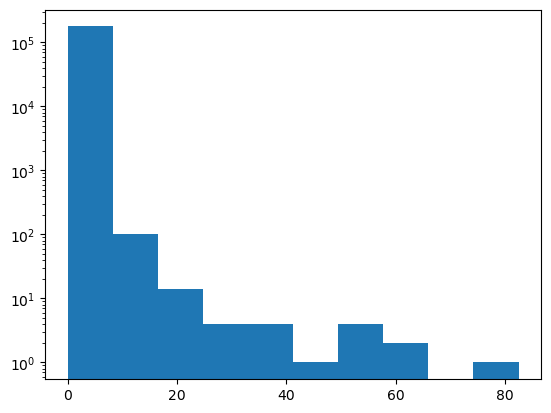

In [18]:
plt.hist(SIMBA_data_bar.T_U)
plt.yscale('log')

# Normal Analysis

In [20]:
data_bar = Astrid_data_bar
data_dm = Astrid_data_dm

all halos= 163185
1e+10 1.593e+14
[10.0, 10.8, 11.6] [12.6, 14.202243037624806]
[10.         10.8        11.6        12.6        14.20224304]
0 Mass range: 1e+10 6.31e+10
# halos bar: 67758 # halos dm: 71925
(67758, 1)
(67758, 4)
here
acceptance rate is  88.43273947844048 %
(71925, 4)


/tmp/ipykernel_72/4123687401.py:150: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_72/4123687401.py:153: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_72/4123687401.py:156: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_72/4123687401.py:181: MatplotlibDeprecationWarning: The collections attribute wa

1 Mass range: 6.31e+10 3.981e+11
# halos bar: 15958 # halos dm: 14878
(15958, 1)
(15958, 4)
here
acceptance rate is  90.46576675179375 %
(14878, 4)


/tmp/ipykernel_72/4123687401.py:150: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_72/4123687401.py:153: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_72/4123687401.py:156: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_72/4123687401.py:181: MatplotlibDeprecationWarning: The collections attribute wa

2 Mass range: 3.981e+11 3.981e+12
# halos bar: 3690 # halos dm: 3242
(3690, 1)
(3690, 4)
here
acceptance rate is  89.55801104972375 %
(3242, 4)


/tmp/ipykernel_72/4123687401.py:150: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_72/4123687401.py:153: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_72/4123687401.py:156: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_72/4123687401.py:181: MatplotlibDeprecationWarning: The collections attribute wa

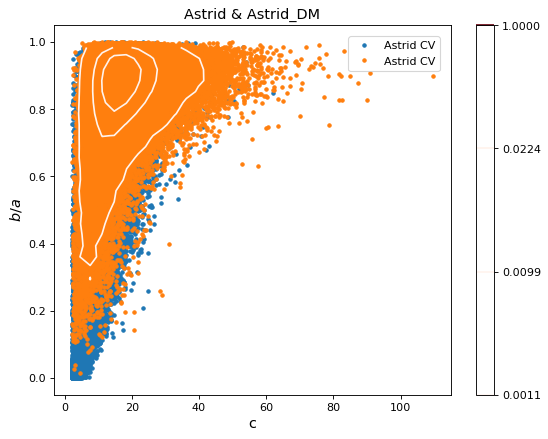

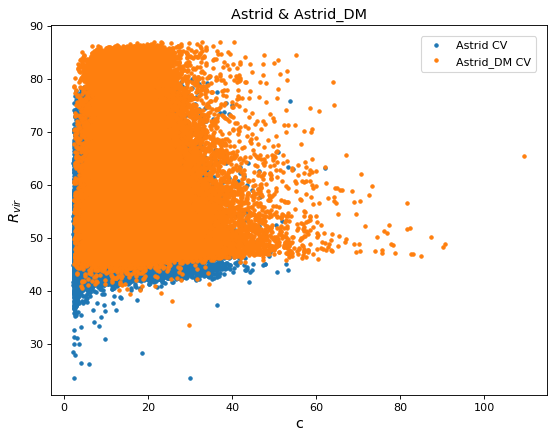

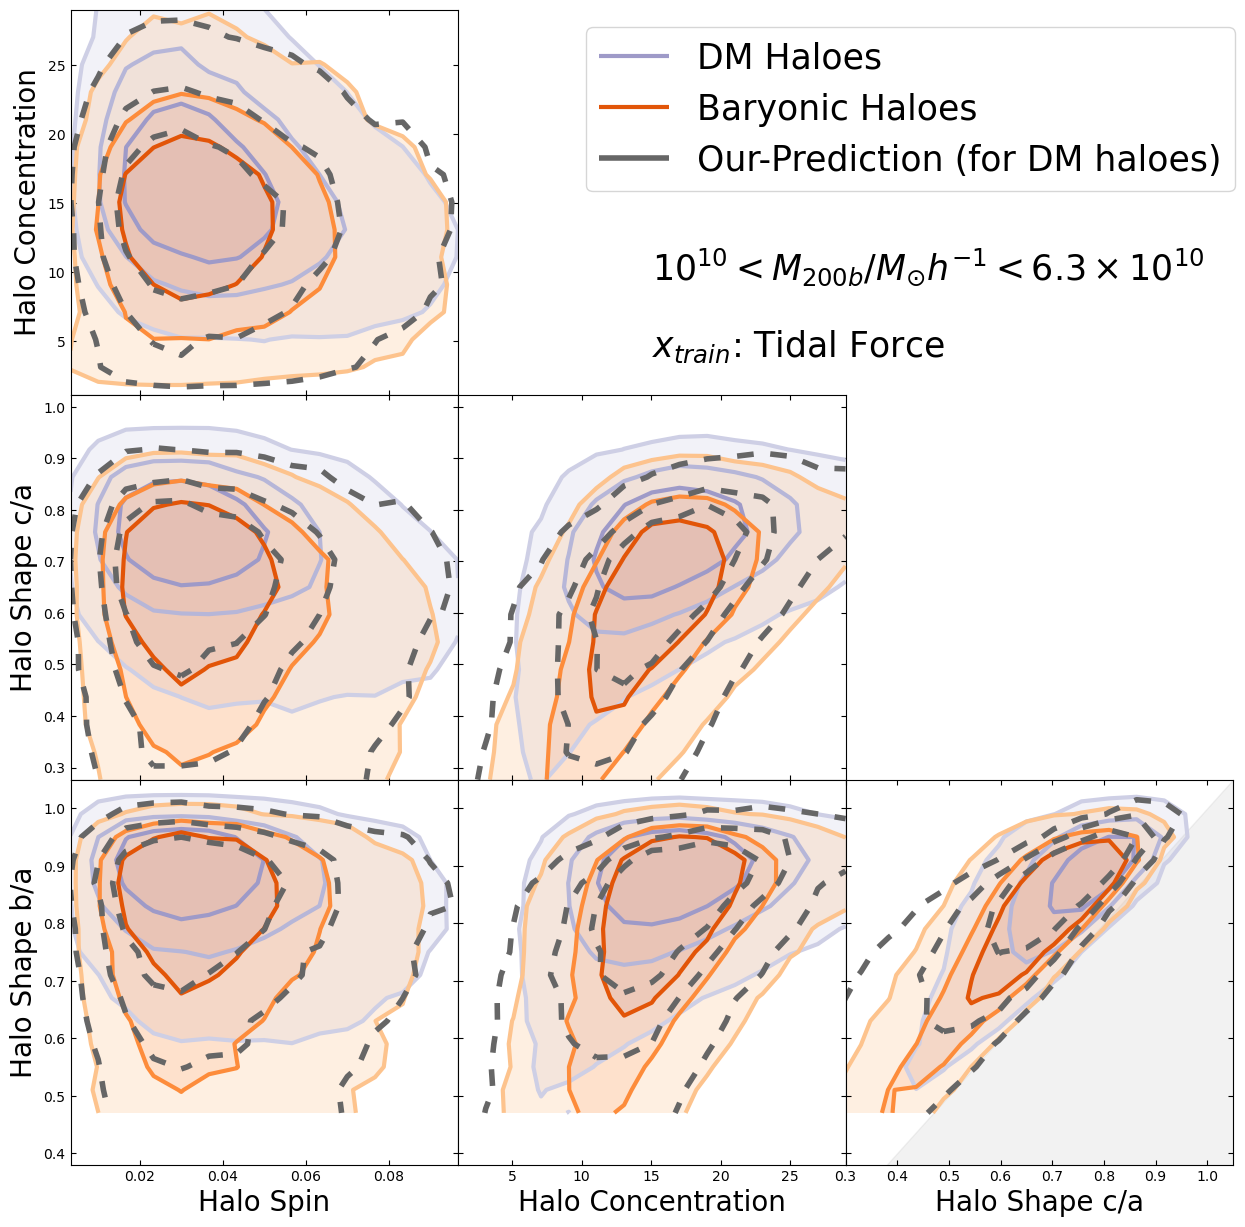

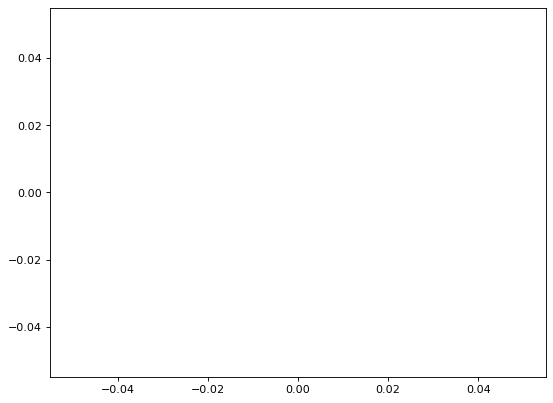

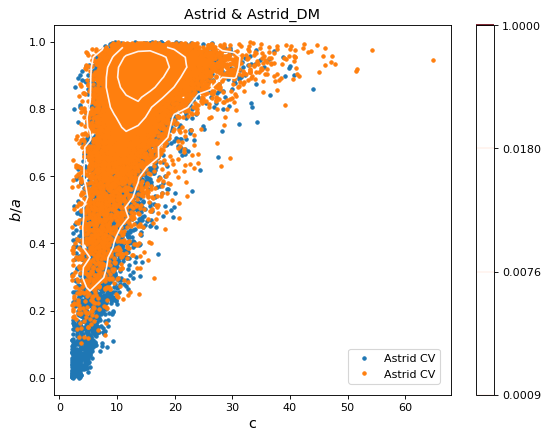

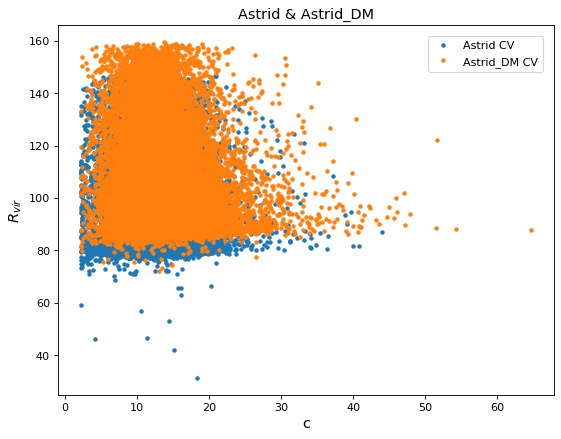

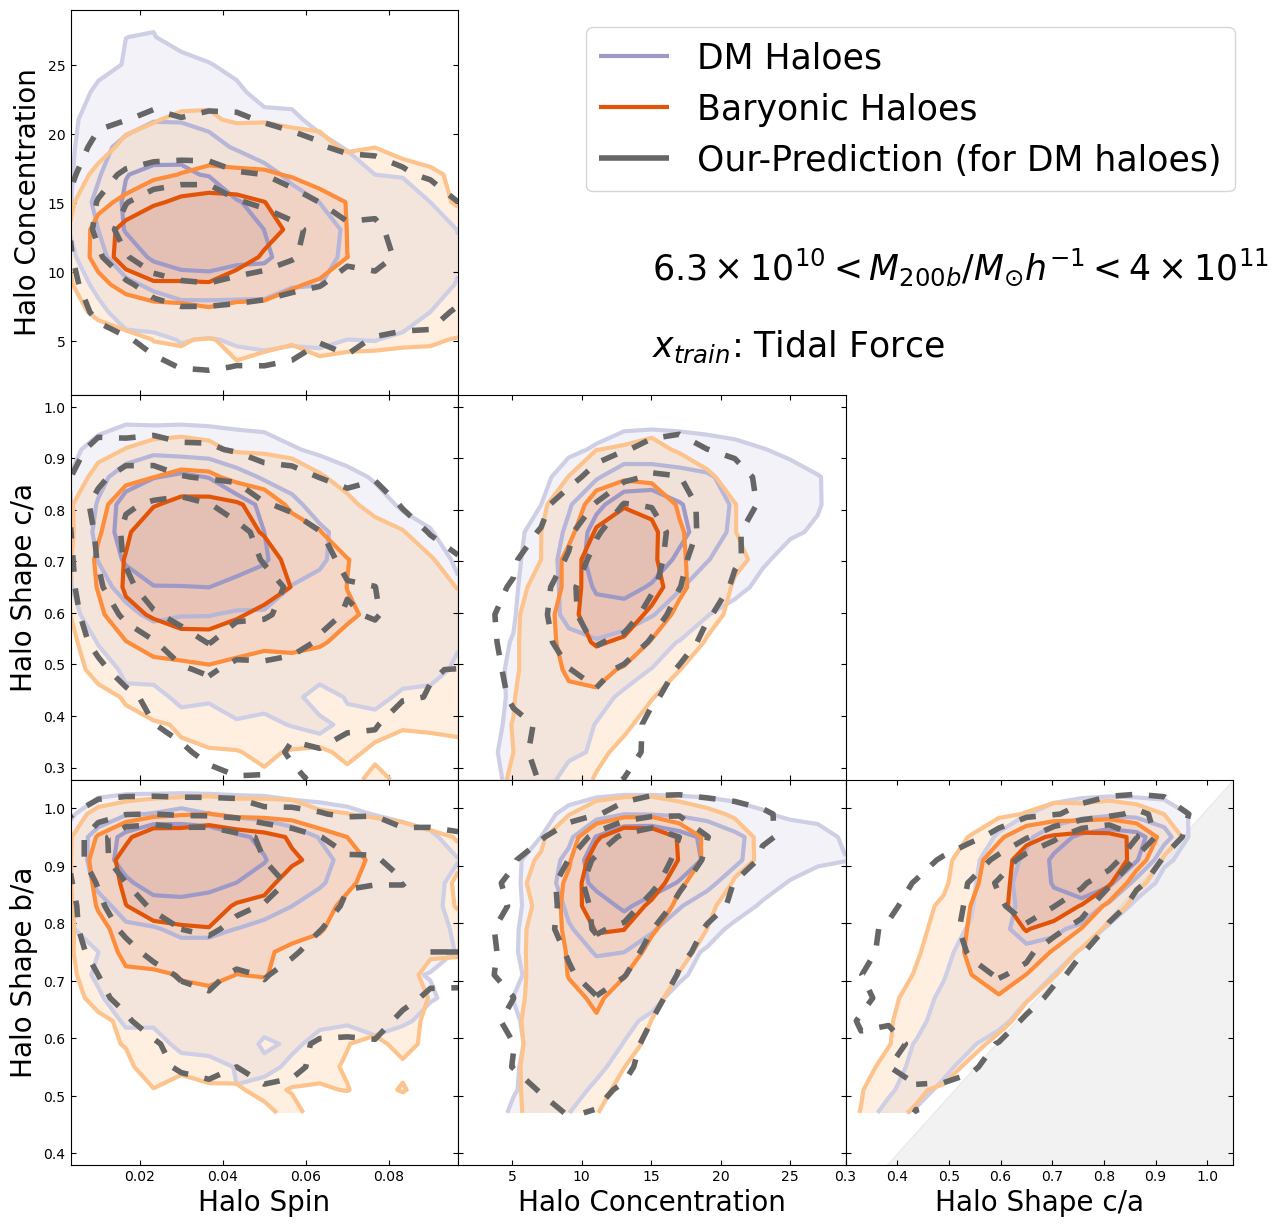

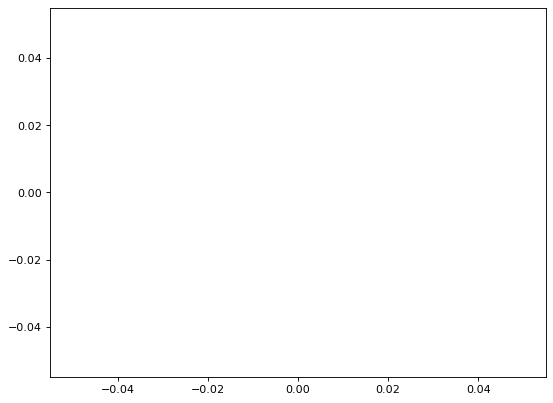

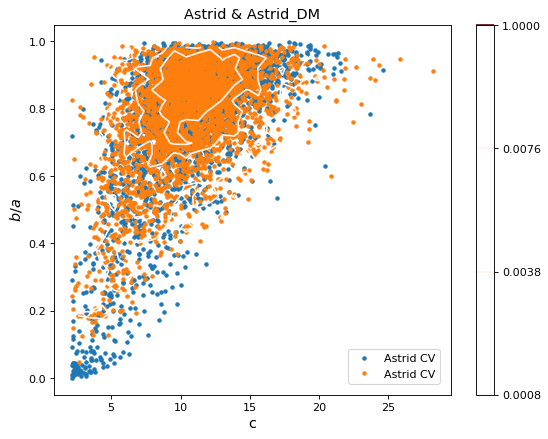

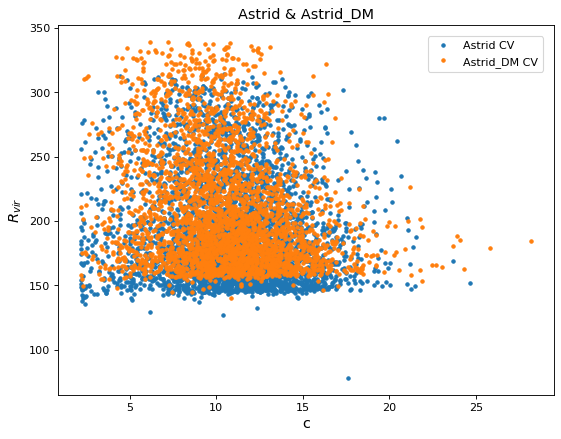

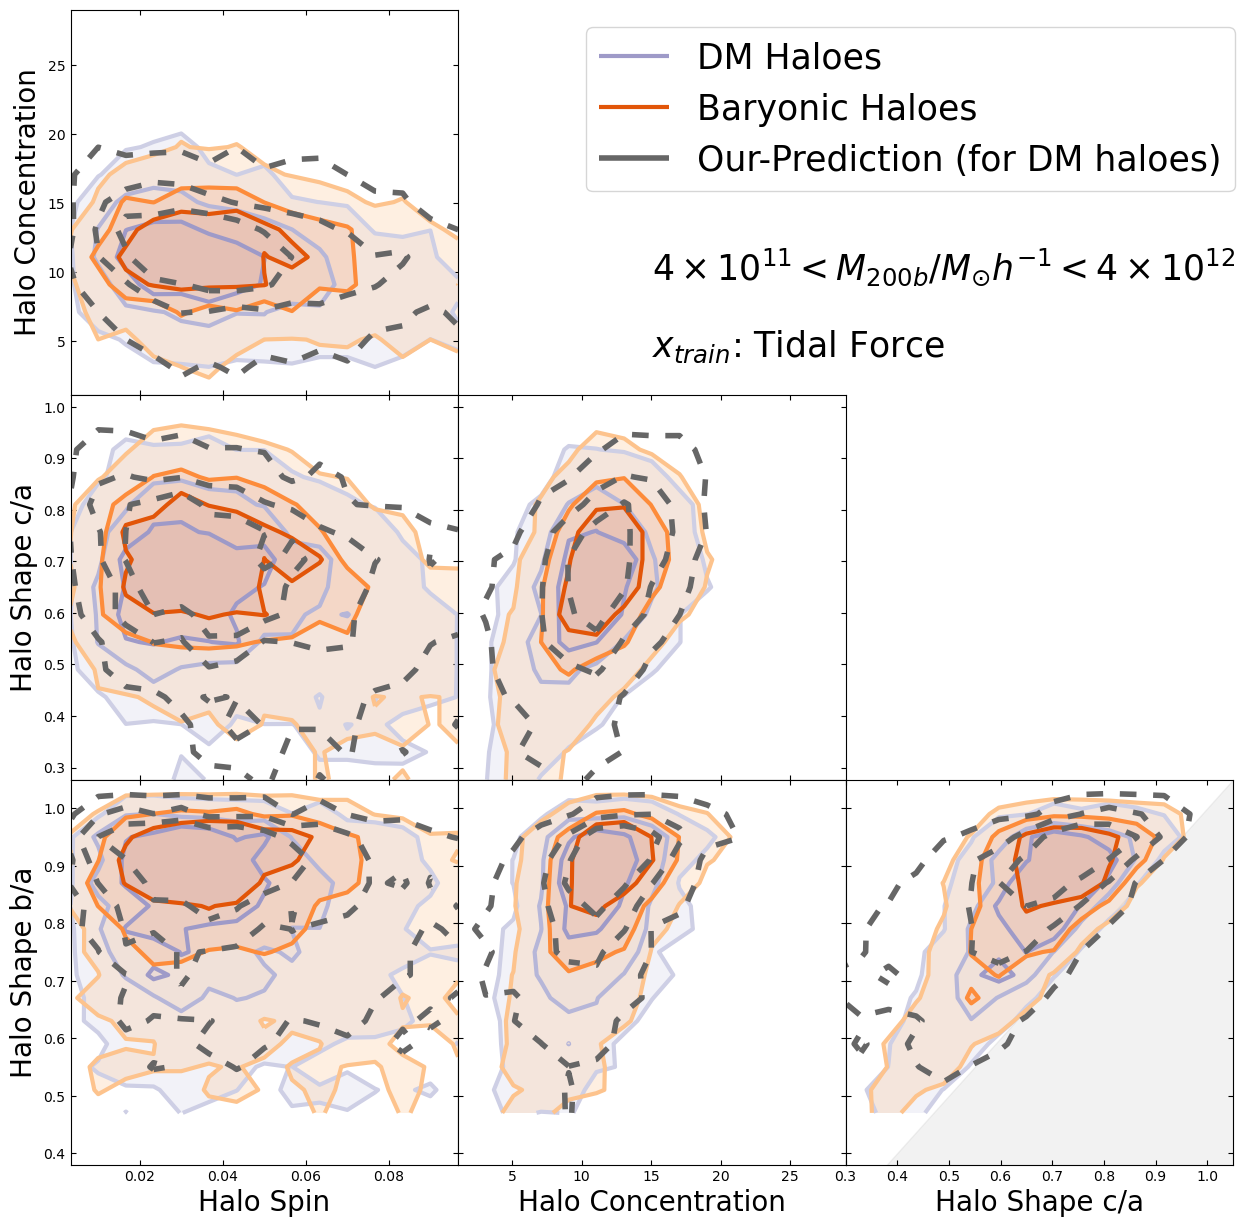

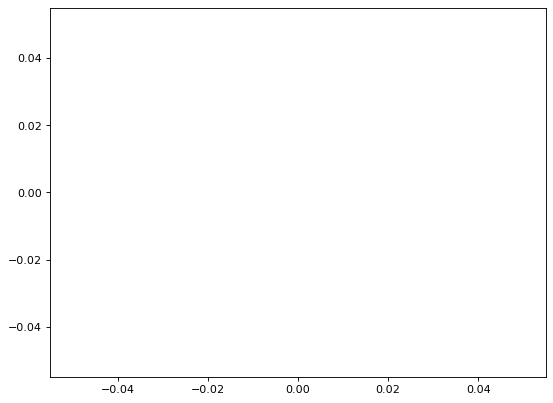

In [23]:
import array
halos_bar_all = data_bar[(data_bar.pid == -1)]
halos_dm_all = data_dm[(data_dm.pid == -1)]
print('all halos=',len(halos_bar_all))
#min_mass_hbar = halos_bar_all.M200b.min()
min_mass_hbar = 10**10
#max_mass_hbar = halos_bar_all.M200b.max()
max_mass_hbar = 10**11.6
mw_mass_i = np.log10(max_mass_hbar)
mw_mass_f = np.log10(10**12.6)
bin_4_i = mw_mass_f
bin_4_f = np.log10(halos_bar_all.M200b.max())
bin_4_f_10 = 10**bin_4_f
bin2_M_bar = [bin_4_i,bin_4_f]
print("%.4g"% min_mass_hbar,"%.4g"% bin_4_f_10)
nbins = 2
bins = np.arange(nbins)
del_logM_bar = np.asarray((np.log10(max_mass_hbar)-np.log10(min_mass_hbar))/nbins)
bins_M_bar = [np.log10(min_mass_hbar)]
name = []
for i in bins+1:
    bins_M_bar.append(np.log10(min_mass_hbar)+ i*del_logM_bar)
    name.append('halos_binM_bar'+'_'+str(i))
print(bins_M_bar,bin2_M_bar)
bins_M_bar = np.asarray(bins_M_bar+bin2_M_bar)
bins_M_bar_10 = np.asarray(10**bins_M_bar)
print(bins_M_bar)
font1 = {'color':  'red',
        'weight': 'normal',
        'size': 13,
        }
font2 = {'color':  'darkmagenta',
        'weight': 'normal',
        'size': 13,
        }
font3 = {'color':  'darkgreen',
        'weight': 'normal',
        'size': 13,
        }
font4 = {'color':  'black',
        'weight': 'normal',
        'size': 12.5,
        }
nbins = 3
bins = np.arange(nbins)
for i in bins:
    print(i,'Mass range:',"%.4g"% 10**bins_M_bar[i],"%.4g"% 10**bins_M_bar[i+1])
    halos_bar = halos_bar_all[(np.log10(halos_bar_all.M200b) >= bins_M_bar[i]) & (np.log10(halos_bar_all.M200b) < bins_M_bar[i+1])]               
    #halos_dm = halos_dm_all[(np.log10(halos_dm_all.M200b) >= bins_M_bar[i]) & (np.log10(halos_dm_all.M200b) < bins_M_bar[i+1])]               
    halos_dm = halos_dm_all[(np.log10(halos_dm_all.M200b02d) >= bins_M_bar[i]) & (np.log10(halos_dm_all.M200b02d) < bins_M_bar[i+1])]               
    print('# halos bar:',len(halos_bar),'# halos dm:',len(halos_dm))
    
    cg = ConditionalMultiVariateGaussian()
    x_train = np.asarray(halos_bar[['TidalForce']]) #np.random.randn(100000,2) ## this could be 100000 baryonified haloes with 2 input properties
    y_train = np.asarray(halos_bar[['cv','Spin','ca','ba']]) #np.random.randn(100000,3) ## this could be 100000 baryonified haloes with 3 output properties
    x_test  = np.asarray(halos_dm[['TidalForce']]) #np.random.randn(20000,2)   ## this could be 20000 dm haloes with 2 input properties


    print (x_train.shape)
    print (y_train.shape)
    cg.fit(x_train,y_train)
    y_pred = cg.predict(x_test)
    print(y_pred.shape)
    valy1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=30, density = False)
    edgex = am(edge1)
    edgey = am(edge2)
    pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

    plt.plot(halos_bar.cv, halos_bar.ba,'.',label = "Astrid CV")
    plt.plot(halos_dm.cv, halos_dm.ba,'.',label = "Astrid CV")
    #plt.text(0.18,80, [bins_M_bar[i],bins_M_bar[i+1]], fontsize=11, fontdict=font2)
    #plt.text(0.18,80,["M200b".format(bins_M_bar[i],bins_M_bar[i+1])])

    #plt.contour(edgex, edgey, valy1.T / np.sum(valy1), levels = 5, cmap = 'Purples')
    #plt.colorbar()

    lvl = confidence_intervals(valy1.T/valy1.sum())
    plt.contour(edgex, edgey,valy1.T/valy1.sum(),levels=lvl,cmap='Reds')
    plt.colorbar()

    plt.title('Astrid & Astrid_DM', fontsize = 13)
    plt.legend(loc = 0, borderaxespad = 1.)
    plt.xlabel('c', fontsize=13)
    plt.ylabel(r'$b/a$', fontsize=13)
    #plt.xscale('log')
    #plt.yscale('log')
    #fig.savefig('fig1.png')
    pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

    plt.plot(halos_bar.cv, halos_bar.Rvir,'.',label = "Astrid CV")
    plt.plot(halos_dm.cv, halos_dm.Rvir,'.',label = "Astrid_DM CV")

    plt.title('Astrid & Astrid_DM', fontsize = 13)
    plt.legend(loc = 0, borderaxespad = 1.)
    plt.xlabel('c', fontsize=13)
    plt.ylabel(r'$R_{vir}$', fontsize=13)
    bins = 15
    ##spin vs conc
    ca_range   = [0.25, 1.05]
    conc_range = [0.1, 30]
    ba_range   = [0.45, 1.05]
    spin_range = [0, 0.1]
    rvir_range = [120, 200]
    density    = False
    valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.cv, bins=bins, range = [ spin_range,conc_range],density=density)
    valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.cv, bins=bins, range = [ spin_range,conc_range],density=density)
    valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,0], bins=bins, range = [ spin_range,conc_range],density=density)
    edgex = am(edge1)
    edgey = am(edge2)
    #%print (edgey)

    ## vs c/a
    _2valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.ca, bins=bins, range = [ spin_range,ca_range],density=density)
    _2valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.ca, bins=bins, range = [ spin_range,ca_range],density=density)
    _2valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,2], bins=bins, range = [ spin_range,ca_range],density=density)
    _2edgex = am(edge1)
    _2edgey = am(edge2)
    #%


    _3valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.ba, bins=bins, range = [ spin_range,ba_range],density=density)
    _3valx1,edge1,edge2 = np.histogram2d(halos_dm.Spin, halos_dm.ba, bins=bins, range = [ spin_range,ba_range],density=density)
    _3valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,3], bins=bins, range = [ spin_range,ba_range],density=density)
    _3edgex = am(edge1)
    _3edgey = am(edge2)

    ## halo concentration vs c/a
    _4valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ca, bins=bins, range = [ conc_range,ca_range],density=density)
    _4valx1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ca, bins=bins, range = [ conc_range,ca_range],density=density)
    _4valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,2], bins=bins, range = [ conc_range,ca_range],density=density)
    _4edgex = am(edge1)
    _4edgey = am(edge2)

    ## halo concentration vs b/a
    _5valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ba, bins=bins, range = [ conc_range,ba_range],density=density)
    _5valx1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=bins, range = [ conc_range,ba_range],density=density)
    _5valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,3], bins=bins, range = [ conc_range,ba_range],density=density)
    _5edgex = am(edge1)
    _5edgey = am(edge2)

    ## ca vs b/a
    _6valy1,edge1,edge2 = np.histogram2d(halos_bar.ca, halos_bar.ba, bins=bins, range = [ ca_range,ba_range],density=density)
    _6valx1,edge1,edge2 = np.histogram2d(halos_dm.ca, halos_dm.ba, bins=bins, range = [ ca_range,ba_range],density=density)
    _6valp1,edge1,edge2 = np.histogram2d(y_pred[:,2], y_pred[:,3], bins=bins, range = [ ca_range,ba_range],density=density)

    _6edgex = am(edge1)
    _6edgey = am(edge2)
    import matplotlib

    cmap = matplotlib.cm.get_cmap('Purples')
    colorp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(1.0)]
    colorpp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(0.9)]
    cmap = matplotlib.cm.get_cmap('binary')
    colorb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
    #colorbb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
    cmap = matplotlib.cm.get_cmap('Oranges')
    coloro = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.8)]
    coloroo = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.89)]

    #colorp = colorp[1:]
    #colorb = colorb[1:]
    #coloro = coloro[1:]

    def easyplot(valx,valy,valp,edgex,edgey,lrview=True,predview=True):
        alpha=0.26
        if lrview ==True:
            lvl = confidence_intervals(valx.T/valx.sum())
            ax.contourf(edgex,edgey,valx.T/valx.sum(),colors=colorp,levels=lvl,alpha=alpha)
            c1 = ax.contour(edgex,edgey,valx.T/valx.sum(),levels=lvl,colors=colorpp,linewidths=3)
            h1,l1 = c1.legend_elements()
        else:
            h1=None
        lvl = confidence_intervals(valy.T/valy.sum())
        ax.contourf(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloroo,alpha=alpha)
        c2 = ax.contour(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloro,linewidths=3)
        h2,l1 = c2.legend_elements()
        if predview == True:
            lvl = confidence_intervals(valp.T/valp.sum())
            CS = ax.contour(edgex,edgey,valp.T/valp.sum(),levels=lvl,colors=colorb,linewidths=4,linestyles='dashed')
            h3,l3 = CS.legend_elements()
            for c in CS.collections:
                c.set_dashes([(1,(3.0,3.0))])
        else:
            h3=None
        return h1,h2,h3
    ######################
    import time
    t = time.time()

    from matplotlib import pyplot as plt
    from matplotlib import ticker, cm
    #%from matplotlib import rc

    #%rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    #%rc('text', usetex=True)

    lvl = [0.0014,0.0028,0.0035,1]
    lvl = 3
    lvl = [0.0014,0.0028,0.01]
    #alpha=0.25

    vmax = 0.008
    vmaxcont = 0.005

    fig,axs  = plt.subplots(3,3,figsize=(15,15),gridspec_kw={ 'wspace':0,'hspace': 0},sharex='col',sharey='row')
    #ax = axs[0,0]
    axs[0, 2].axis('off')
    axs[0, 1].axis('off')
    axs[1, 2].set_visible(False)

    ax = axs[0,0]
    h1,h2,h3 = easyplot(valx1,valy1,valp1,edgex,edgey)
    axs[0,0].yaxis.set_ticks_position('both')
    axs[0,0].tick_params(axis='x', direction='in')
    axs[0,0].tick_params(axis='y', direction='in')
    axs[0,0].xaxis.set_ticks_position('both')
    axs[0,0].set_ylabel('Halo Concentration',fontsize=20)
    #1.29760000e+08 1.39624431e+10 1.50238762e+12 1.61660000e+14
    if i ==0:
        axs[0,0].text(1.5,0.3, '$ 10^{10} < M_{200b}/M_{\odot}h^{-1} < 6.3 \\times 10^{10}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==1:
        axs[0,0].text(1.5,0.3, '$6.3 \\times 10^{10} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{11}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==2:
        axs[0,0].text(1.5,0.3, '$4 \\times 10^{11} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{12}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==3:
        axs[0,0].text(1.5,0.3, '$4 \\times 10^{12} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{14}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)
          
    if h3 is not None:
        axs[0,0].legend([h1[-2], h2[-2],h3[-2]], ['DM Haloes', 'Baryonic Haloes','Our-Prediction (for DM haloes)'],fontsize=25,bbox_to_anchor=(3.05, 1))
    else:
        axs[0,0].legend([h1[-2], h2[-2]], ['DM Haloes', 'Baryonic Haloes'],fontsize=25,bbox_to_anchor=(3.05, 1))
        axs[0,0].text(2,0.5, '$2 \\times 10^{11} < M_{200}/M_{\odot}h^{-1} < 10^{12}$', transform = axs[0,0].transAxes, fontsize = 25)

    #axs[1, 0].contourf(_2edgex,_2edgey,_2valy.T/_2valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[1, 0].contour(_2edgex,_2edgey,_2valy.T/_2valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[1, 0].contourf(_2edgex,_2edgey,_2valx.T/_2valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[1, 0].contour(_2edgex,_2edgey,_2valx.T/_2valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    axs[1,0].set_ylabel('Halo Shape c/a',fontsize=20)
    #CS = axs[1, 0].contour(_2edgex,_2edgey,_2valp.T/_2valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3.5,linestyles='dotted')
    ax = axs[1,0]
    easyplot(_2valx1,_2valy1,_2valp1,_2edgex,_2edgey)
    axs[1,0].yaxis.set_ticks_position('both')
    axs[1,0].tick_params(axis='x', direction='in')
    axs[1,0].tick_params(axis='y', direction='in')
    axs[1,0].xaxis.set_ticks_position('both')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])


    #axs[2, 0].contourf(_3edgex,_3edgey,_3valy.T/_3valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[2, 0].contour(_3edgex,_3edgey,_3valy.T/_3valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[2, 0].contourf(_3edgex,_3edgey,_3valx.T/_3valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[2, 0].contour(_3edgex,_3edgey,_3valx.T/_3valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    ax = axs[2,0]
    easyplot(_3valx1,_3valy1,_3valp1,_3edgex,_3edgey)
    axs[2,0].set_ylabel('Halo Shape b/a',fontsize=20)
    axs[2,0].yaxis.set_ticks_position('both')
    axs[2,0].tick_params(axis='x', direction='in')
    axs[2,0].tick_params(axis='y', direction='in')
    axs[2,0].xaxis.set_ticks_position('both')
    #CS = axs[2, 0].contour(_3edgex,_3edgey,_3valp.T/_3valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])
    axs[2,0].set_xlabel('Halo Spin',fontsize=20)


    ## halo conc vs c/a
    #axs[1, 1].contourf(_4edgex,_4edgey,_4valy.T/_4valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[1, 1].contour(_4edgex,_4edgey,_4valy.T/_4valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[1, 1].contourf(_4edgex,_4edgey,_4valx.T/_4valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[1, 1].contour(_4edgex,_4edgey,_4valx.T/_4valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    ax = axs[1,1]
    easyplot(_4valx1,_4valy1,_4valp1,_4edgex,_4edgey)

    axs[1,1].yaxis.set_ticks_position('both')
    axs[1,1].tick_params(axis='x', direction='in')
    axs[1,1].tick_params(axis='y', direction='in')
    axs[1,1].xaxis.set_ticks_position('both')
    #CS = axs[1, 1].contour(_4edgex,_4edgey,_4valp.T/_4valp.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])


    ## halo conc vs b/a
    #axs[2, 1].contourf(_5edgex,_5edgey,_5valy.T/_5valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[2, 1].contour(_5edgex,_5edgey,_5valy.T/_5valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[2, 1].contourf(_5edgex,_5edgey,_5valx.T/_5valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[2, 1].contour(_5edgex,_5edgey,_5valx.T/_5valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    axs[2,1].yaxis.set_ticks_position('both')
    axs[2,1].tick_params(axis='x', direction='in')
    axs[2,1].tick_params(axis='y', direction='in')
    axs[2,1].xaxis.set_ticks_position('both')
    #CS = axs[2, 1].contour(_5edgex,_5edgey,_5valp.T/_5valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])
    axs[2, 1].set_xlabel('Halo Concentration',fontsize=20)
    ax = axs[2,1]
    easyplot(_5valx1,_5valy1,_5valp1,_5edgex,_5edgey)


    ## halo conc vs b/a
    #axs[2, 2].contourf(_6edgex,_6edgey,_6valy.T/_6valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
    #axs[2, 2].contour(_6edgex,_6edgey,_6valy.T/_6valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
    #axs[2, 2].contourf(_6edgex,_6edgey,_6valx.T/_6valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
    #axs[2, 2].contour(_6edgex,_6edgey,_6valx.T/_6valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
    axs[2,2].yaxis.set_ticks_position('both')
    axs[2,2].tick_params(axis='x', direction='in')
    axs[2,2].tick_params(axis='y', direction='in')
    axs[2,2].xaxis.set_ticks_position('both')
    #CS = axs[2, 2].contour(_6edgex,_6edgey,_6valp.T/_6valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
    #for c in CS.collections:
    #    c.set_dashes([(11, (3.0, 3.0))])
    ax = axs[2,2]
    x = np.linspace(0, 1.1, 4)
    y = x
    plt.fill_between(x, y, where=(x > 0), color='grey', alpha=0.1)
    ax.set_xlim([0.3,1.05])
    ax.set_ylim([0.38,1.05])

    easyplot(_6valx1,_6valy1,_6valp1,_6edgex,_6edgey)


    axs[2, 2].set_xlabel('Halo Shape c/a',fontsize=20)
    #axs[0, 0].contourf(edgex,edgey,valp.T,vmin=0,vmax=1.5,levels=lvl,cmap='Purples',alpha=0.5)


    #plt.subplots_adjust(hspace=.0)
    #axs[0,0].grid()
    #axs[1,0].grid()
    #axs[1,1].grid()
    #axs[2,0].grid()
    #axs[2,1].grid()
    #axs[2,2].grid()
    #print (time.time()-t)

    plt.savefig('Astrid_BarVsDM'+str(i)+'_TF_HMFDEX.pdf')
    
    
    #check dm halo concentrations
    meanHdms = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(halos_dm.M200b02d),statistic='mean', bins=11, range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    meanHdm = 10**meanHdms[0]
    cvmdms = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(halos_dm.cv),statistic='median', bins=11,range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    cvm_dm_sim = 10**cvmdms[0]
    cvmdms_pred = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(y_pred[:,0]),statistic='median', bins=11,range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    cvm_dm_pred = 10**cvmdms_pred[0]
    pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')
    #plt.plot(halos_dm.M200b, halos_dm.cv,'.',label = "simulations")
    #plt.plot(halos_dm.M200b, y_pred[:,0],'.',label = "our-prediction")
    plt.plot(meanHdm, cvm_dm_sim,'-',label = "simulations")
    plt.plot(meanHdm, cvm_dm_pred,'-',label = "our-prediction")

In [24]:
bins_M_bar = [10., 10.8, 11.6, 12.6, 14.208]

In [25]:
ind = np.random.choice(len(halos_bar), 10000)

In [26]:
halos_bar

id  pid     Rvir     Spin  Rs_Klypin          M200b       ba  \
23   901230   -1  308.228  0.04852    26.6919  3701000000000  0.68872   
25   903461   -1  296.448  0.01943    32.7595  3562900000000  0.87870   
26   899417   -1  290.196  0.02650    22.1387  3070100000000  0.93400   
27   902448   -1  289.952  0.02160    33.3173  3027000000000  0.73940   
28   897576   -1  278.241  0.02803    29.6669  2926200000000  0.79342   
..      ...  ...      ...      ...        ...            ...      ...   
185  927300   -1  149.446  0.02741    12.6743   426290000000  0.78333   
187  927988   -1  147.671  0.06516    12.3559   433900000000  0.92233   
188  932242   -1  147.487  0.09589    19.1719   426170000000  0.54622   
190  928001   -1  146.022  0.02985    10.8791   405610000000  0.91340   
192  929789   -1  144.891  0.03560    19.7161   421880000000  0.67270   

          ca   ba500c         cv   ca500c     T_U         Vpeak    TidalForce  
23   0.52582  0.64615  11.547623  0.51935  0.5514  3.443000e+12  3.443000e+12  
25   0.74998  0.89563   9.049222  0.73883  0.5518  3.063000e+12  3.063000e+12  
26   0.68321  0.88746  13.108087  0.62672  0.5105  2.873000e+12  2.873000e+12  
27   0.67288  0.80079   8.702746  0.70241  0.5334  2.866000e+12  2.866000e+12  
28   0.49856  0.69983   9.378836  0.47448  0.5423  2.533000e+12  2.533000e+12  
..       ...      ...        ...      ...     ...           ...           ...  
185  0.62973  0.73266  11.791263  0.56048  0.5379  3.924000e+11  3.924000e+11  
187  0.66700  0.89037  11.951456  0.57910  0.5192  3.786000e+11  3.786000e+11  
188  0.31049  0.31833   7.692873  0.14591  0.6116  3.772000e+11  3.772000e+11  
190  0.78516  0.86811  13.422250  0.78947  0.5118  3.661000e+11  3.661000e+11  
192  0.54454  0.47381   7.348867  0.46770  0.5909  3.576000e+11  3.576000e+11  

[3690 rows x 14 columns]

In [27]:
halos_bar.iloc[ind].cv

36      8.089892
97      3.555053
107     8.594860
33      5.335567
80     10.972902
         ...    
45     11.998745
124     5.631399
46     11.692071
113    13.726353
124    10.123708
Name: cv, Length: 10000, dtype: float64

0 Mass range: 1e+10 6.31e+10
# halos bar: 67758 # halos dm: 71925
here
acceptance rate is  88.50564811852435 %
pval (Bar-DM) = 1.275900026476611e-79
pval (Bar-pred) = 0.0013548043358769524
pval (Bar-DM) = 0.061314567263710956
pval (Bar-pred) = 0.09235100892515725
pval (Bar-DM) = 0.0
pval (Bar-pred) = 0.009842328830031829
pval (Bar-DM) = 2.088738624e-315
pval (Bar-pred) = 4.842921664710194e-15


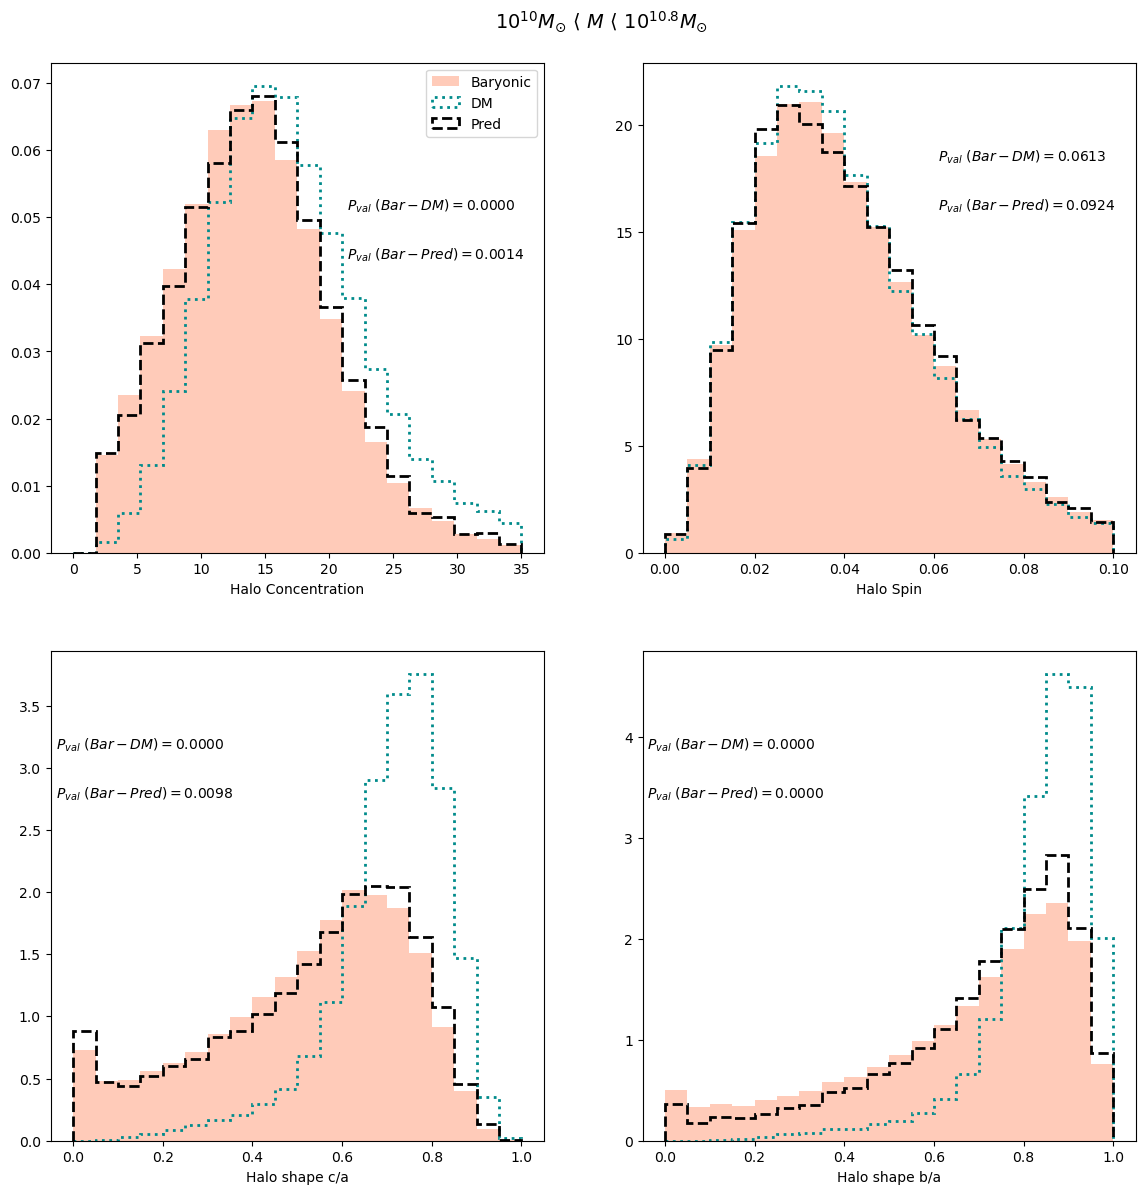

1 Mass range: 6.31e+10 3.981e+11
# halos bar: 15958 # halos dm: 14878
here
acceptance rate is  91.04148818994004 %
pval (Bar-DM) = 8.269381195874732e-60
pval (Bar-pred) = 1.3435752410930958e-05
pval (Bar-DM) = 4.663190910072695e-16
pval (Bar-pred) = 0.5120142730148939
pval (Bar-DM) = 1.332997844203813e-141
pval (Bar-pred) = 0.01273501809411445
pval (Bar-DM) = 1.5787585338445487e-70
pval (Bar-pred) = 2.455492952026131e-14


<Figure size 640x480 with 0 Axes>

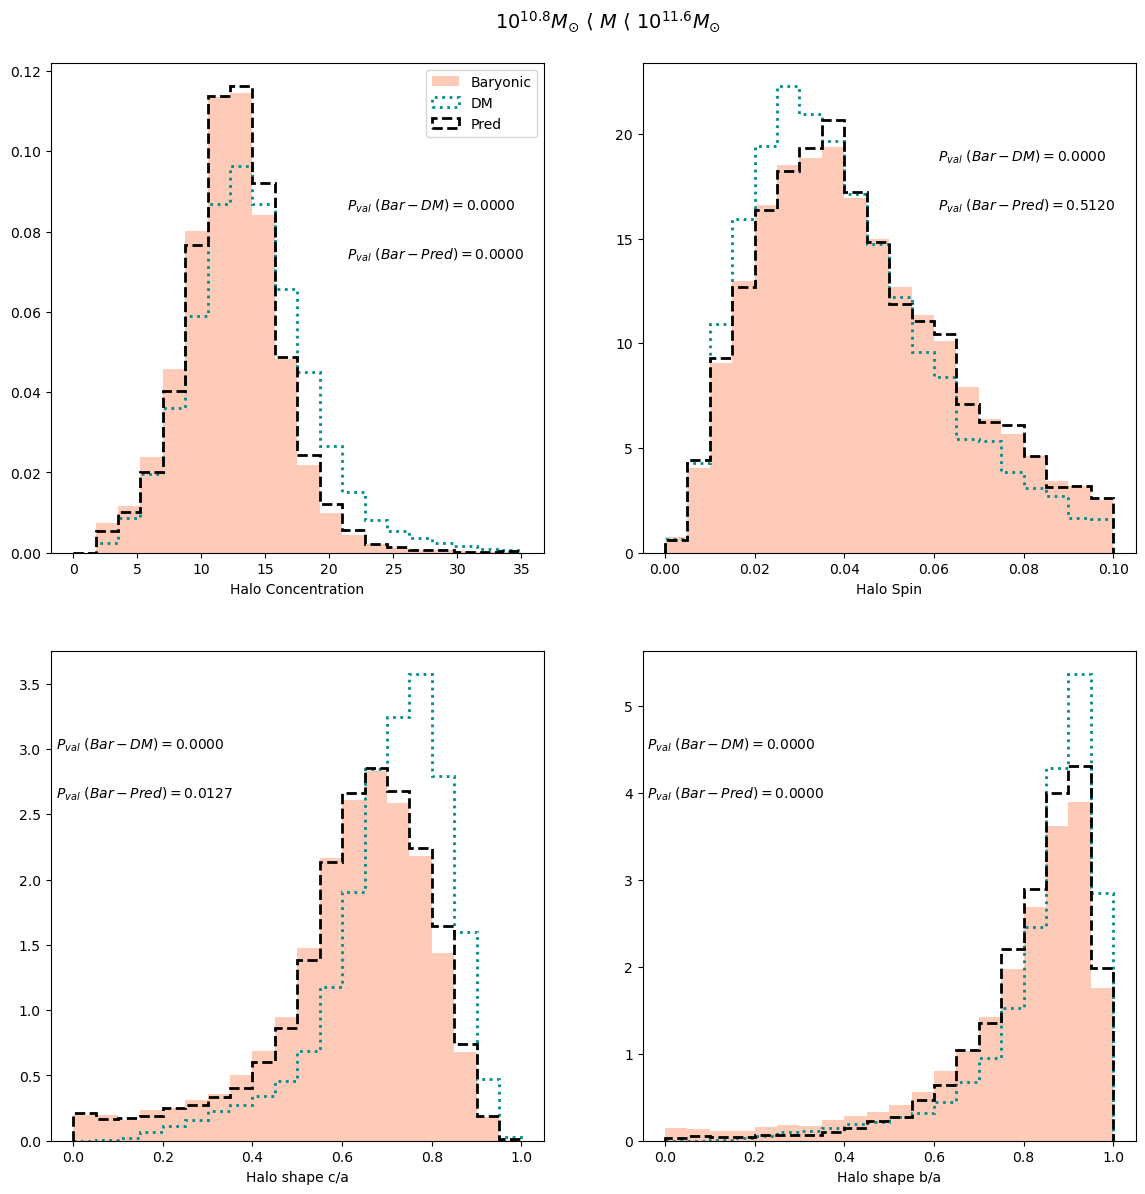

2 Mass range: 3.981e+11 3.981e+12
# halos bar: 3690 # halos dm: 3242
here
acceptance rate is  90.60927892677473 %
pval (Bar-DM) = 3.397664342239417e-11
pval (Bar-pred) = 0.02545165519998209
pval (Bar-DM) = 8.542289244248157e-13
pval (Bar-pred) = 0.9040404249696031
pval (Bar-DM) = 1.7870671316601133e-10
pval (Bar-pred) = 0.1550440526313111
pval (Bar-DM) = 2.1643283574980485e-23
pval (Bar-pred) = 2.5896540322195166e-08


<Figure size 640x480 with 0 Axes>

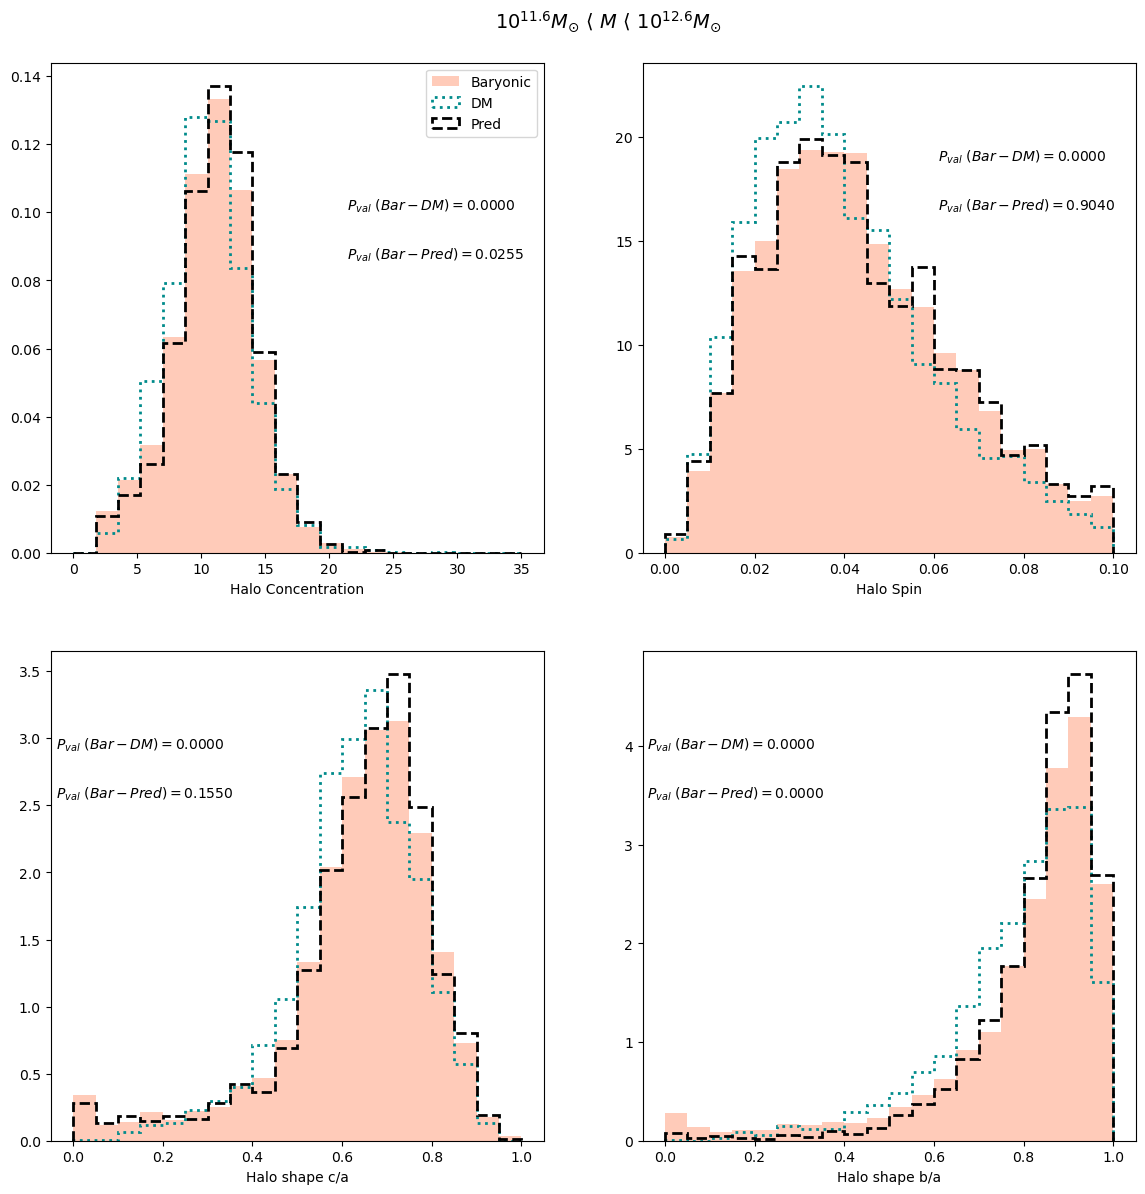

<Figure size 640x480 with 0 Axes>

In [28]:
font1 = {'color':  'red',
        'weight': 'normal',
        'size': 13,
        }
font2 = {'color':  'darkmagenta',
        'weight': 'normal',
        'size': 13,
        }
font3 = {'color':  'darkgreen',
        'weight': 'normal',
        'size': 13,
        }
font4 = {'color':  'black',
        'weight': 'normal',
        'size': 12.5,
        }
nbins = 3
bins = np.arange(nbins)

hist_bins = 20
titles = ['$10^{10} M_{\odot} \ \langle \ M \ \langle \ 10^{10.8} M_{\odot}$',
          '$10^{10.8} M_{\odot} \ \langle \ M \ \langle \ 10^{11.6} M_{\odot}$',
          '$10^{11.6} M_{\odot} \ \langle \ M \ \langle \ 10^{12.6} M_{\odot}$']
for i in bins:
    print(i,'Mass range:',"%.4g"% 10**bins_M_bar[i],"%.4g"% 10**bins_M_bar[i+1])
    halos_bar = halos_bar_all[(np.log10(halos_bar_all.M200b) >= bins_M_bar[i]) & (np.log10(halos_bar_all.M200b) < bins_M_bar[i+1])]        
    halos_dm = halos_dm_all[(np.log10(halos_dm_all.M200b02d) >= bins_M_bar[i]) & (np.log10(halos_dm_all.M200b02d) < bins_M_bar[i+1])]               
    print('# halos bar:',len(halos_bar),'# halos dm:',len(halos_dm))
    
    cg = ConditionalMultiVariateGaussian()
    x_train = np.asarray(halos_bar[['TidalForce']]) #np.random.randn(100000,2) ## this could be 100000 baryonified haloes with 2 input properties
    y_train = np.asarray(halos_bar[['cv','Spin','ca','ba']]) #np.random.randn(100000,3) ## this could be 100000 baryonified haloes with 3 output properties
    x_test  = np.asarray(halos_dm[['TidalForce']]) #np.random.randn(20000,2)   ## this could be 20000 dm haloes with 2 input properties

    cg.fit(x_train,y_train)
    y_pred = cg.predict(x_test)
    
    fig, ax = plt.subplots(2,2, figsize = (14,14))
    
    # CV
    ax[0,0].hist(halos_bar.cv, color = 'coral', lw = 2, bins = hist_bins, range = (0,35), alpha = 0.4, label = 'Baryonic', density = True)
    ax[0,0].hist(halos_dm.cv, histtype = 'step', color = 'darkcyan', lw = 2, bins = hist_bins, range = (0,35), ls = ':', label = 'DM', density = True)
    ax[0,0].hist(y_pred[:,0], histtype = 'step', color = 'black', lw = 2, bins = hist_bins, range = (0,35), ls = '--', label = 'Pred', density = True)

    if len(halos_bar) > 5000: 
        ind_bar = np.random.choice(len(halos_bar), 5000, replace = False)
    else: ind_bar = np.arange(len(halos_bar))
    if len(halos_dm) > 5000: ind_dm = np.random.choice(len(halos_dm), 5000, replace = False)
    else: ind_dm = np.arange(len(halos_dm))
    
    ks = ks_2samp(halos_bar.iloc[ind_bar].cv, halos_dm.iloc[ind_dm].cv)[1]
    print('pval (Bar-DM) = ' + str(ks))
    ax[0,0].text(0.6,0.7, '$P_{val}\ (Bar-DM)=$' + '{:.4f}'.format(ks), transform = ax[0,0].transAxes)
    ks = ks_2samp(halos_bar.iloc[ind_bar].cv, y_pred[ind_dm,0])[1]
    print('pval (Bar-pred) = ' + str(ks))
    ax[0,0].text(0.6,0.6, '$P_{val}\ (Bar-Pred)=$' + '{:.4f}'.format(ks), transform = ax[0,0].transAxes)

    ax[0,0].set_xlabel('Halo Concentration')
    ax[0,0].legend()
    ax[0,0].text(0.9,1.07, titles[i], transform = ax[0,0].transAxes, fontsize = 14)
    
    # Spin
    ax[0,1].hist(halos_bar.Spin, color = 'coral', lw = 2, bins = hist_bins, range = (0,0.1), alpha = 0.4, label = 'Baryonic', density = True)
    ax[0,1].hist(halos_dm.Spin, histtype = 'step', color = 'darkcyan', lw = 2, bins = hist_bins, range = (0,0.1), ls = ':', label = 'DM', density = True)
    ax[0,1].hist(y_pred[:,1], histtype = 'step', color = 'black', lw = 2, bins = hist_bins, range = (0,0.1), ls = '--', label = 'Pred', density = True)

    ks = ks_2samp(halos_bar.iloc[ind_bar].Spin, halos_dm.iloc[ind_dm].Spin)[1]
    print('pval (Bar-DM) = ' + str(ks))
    ax[0,1].text(0.6,0.8, '$P_{val}\ (Bar-DM)=$' + '{:.4f}'.format(ks), transform = ax[0,1].transAxes)
    ks = ks_2samp(halos_bar.iloc[ind_bar].Spin, y_pred[ind_dm,1])[1]
    print('pval (Bar-pred) = ' + str(ks))
    ax[0,1].text(0.6,0.7, '$P_{val}\ (Bar-Pred)=$' + '{:.4f}'.format(ks), transform = ax[0,1].transAxes)

    ax[0,1].set_xlabel('Halo Spin')
    
    # Ca
    ax[1,0].hist(halos_bar.ca, color = 'coral', lw = 2, bins = hist_bins, range = (0,1), alpha = 0.4, label = 'Baryonic', density = True)
    ax[1,0].hist(halos_dm.ca, histtype = 'step', color = 'darkcyan', lw = 2, bins = hist_bins, range = (0,1), ls = ':', label = 'DM', density = True)
    ax[1,0].hist(y_pred[:,2], histtype = 'step', color = 'black', lw = 2, bins = hist_bins, range = (0,1), ls = '--', label = 'Pred', density = True)

    ks = ks_2samp(halos_bar.iloc[ind_bar].ca, halos_dm.iloc[ind_dm].ca)[1]
    print('pval (Bar-DM) = ' + str(ks))
    ax[1,0].text(0.01,0.8, '$P_{val}\ (Bar-DM)=$' + '{:.4f}'.format(ks), transform = ax[1,0].transAxes)
    ks = ks_2samp(halos_bar.iloc[ind_bar].ca, y_pred[ind_dm,2])[1]
    print('pval (Bar-pred) = ' + str(ks))
    ax[1,0].text(0.01,0.7, '$P_{val}\ (Bar-Pred)=$' + '{:.4f}'.format(ks), transform = ax[1,0].transAxes)

    ax[1,0].set_xlabel('Halo shape c/a')
    
    # CV
    ax[1,1].hist(halos_bar.ba, color = 'coral', lw = 2, bins = hist_bins, range = (0,1), alpha = 0.4, label = 'Baryonic', density = True)
    ax[1,1].hist(halos_dm.ba, histtype = 'step', color = 'darkcyan', lw = 2, bins = hist_bins, range = (0,1), ls = ':', label = 'DM', density = True)
    ax[1,1].hist(y_pred[:,3], histtype = 'step', color = 'black', lw = 2, bins = hist_bins, range = (0,1), ls = '--', label = 'Pred', density = True)

    ks = ks_2samp(halos_bar.iloc[ind_bar].ba, halos_dm.iloc[ind_dm].ba)[1]
    print('pval (Bar-DM) = ' + str(ks))
    ax[1,1].text(0.01,0.8, '$P_{val}\ (Bar-DM)=$' + '{:.4f}'.format(ks), transform = ax[1,1].transAxes)
    ks = ks_2samp(halos_bar.iloc[ind_bar].ba, y_pred[ind_dm,3])[1]
    print('pval (Bar-pred) = ' + str(ks))
    ax[1,1].text(0.01,0.7, '$P_{val}\ (Bar-Pred)=$' + '{:.4f}'.format(ks), transform = ax[1,1].transAxes)

    ax[1,1].set_xlabel('Halo shape b/a')
    
    #plt.savefig('ASTRID_1d_distributions_' + str(i) + '.pdf')
    plt.show()
    plt.clf()

# Cross-Simulation Analysis

In [92]:
halos_bar_all = SIMBA_data_bar[(SIMBA_data_bar.pid == -1)]
halos_dm_all = SIMBA_data_dm[(SIMBA_data_dm.pid == -1)]
print('all halos=',len(halos_bar_all))
#min_mass_hbar = halos_bar_all.M200b.min()
min_mass_hbar = 10**10
#max_mass_hbar = halos_bar_all.M200b.max()
max_mass_hbar = 10**11.6
mw_mass_i = np.log10(max_mass_hbar)
mw_mass_f = np.log10(10**12.6)
bin_4_i = mw_mass_f
bin_4_f = np.log10(halos_bar_all.M200b.max())
bin_4_f_10 = 10**bin_4_f
bin2_M_bar = [bin_4_i,bin_4_f]
print("%.4g"% min_mass_hbar,"%.4g"% bin_4_f_10)
nbins = 2
bins = np.arange(nbins)
del_logM_bar = np.asarray((np.log10(max_mass_hbar)-np.log10(min_mass_hbar))/nbins)
bins_M_bar = [np.log10(min_mass_hbar)]
name = []
for i in bins+1:
    bins_M_bar.append(np.log10(min_mass_hbar)+ i*del_logM_bar)
    name.append('halos_binM_bar'+'_'+str(i))
print(bins_M_bar,bin2_M_bar)
bins_M_bar = np.asarray(bins_M_bar+bin2_M_bar)
bins_M_bar_10 = np.asarray(10**bins_M_bar)
print(bins_M_bar)

all halos= 166463
1e+10 1.551e+14
[10.0, 10.8, 11.6] [12.6, 14.190751779920184]
[10.         10.8        11.6        12.6        14.19075178]


In [93]:
cmap = matplotlib.cm.get_cmap('Purples')
colorp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(1.0)]
colorpp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(0.9)]
cmap = matplotlib.cm.get_cmap('binary')
colorb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
#colorbb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
cmap = matplotlib.cm.get_cmap('Oranges')
coloro = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.8)]
coloroo = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.89)]


/tmp/ipykernel_72/99238541.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_72/99238541.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_72/99238541.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')


In [94]:
from matplotlib.lines import Line2D
line0 = Line2D([0], [0], color=colorp[3], lw = 4)
line1 = Line2D([0], [0], color='magenta', lw = 4)
line2 = Line2D([0], [0], color=coloro[3], lw = 4)
line3 = Line2D([0], [0], color=colorb[3], lw = 4)

0 Mass range: 1e+10 6.31e+10
# halos bar: 64365 # halos dm: 72045
(64365, 1)
(64365, 4)
here
acceptance rate is  86.91324961094423 %
(72045, 4)


/tmp/ipykernel_72/2220657330.py:121: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_72/2220657330.py:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_72/2220657330.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_72/4123687401.py:181: MatplotlibDeprecationWarning: The collections attribute wa

1 Mass range: 6.31e+10 3.981e+11
# halos bar: 14638 # halos dm: 14848
(14638, 1)
(14638, 4)
here
acceptance rate is  84.61363118304081 %
(14848, 4)


/tmp/ipykernel_72/2220657330.py:121: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_72/2220657330.py:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_72/2220657330.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_72/4123687401.py:181: MatplotlibDeprecationWarning: The collections attribute wa

2 Mass range: 3.981e+11 3.981e+12
# halos bar: 3640 # halos dm: 3250
(3640, 1)
(3640, 4)
here
acceptance rate is  87.6010781671159 %
(3250, 4)


/tmp/ipykernel_72/2220657330.py:121: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_72/2220657330.py:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_72/2220657330.py:126: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')
/tmp/ipykernel_72/4123687401.py:181: MatplotlibDeprecationWarning: The collections attribute wa

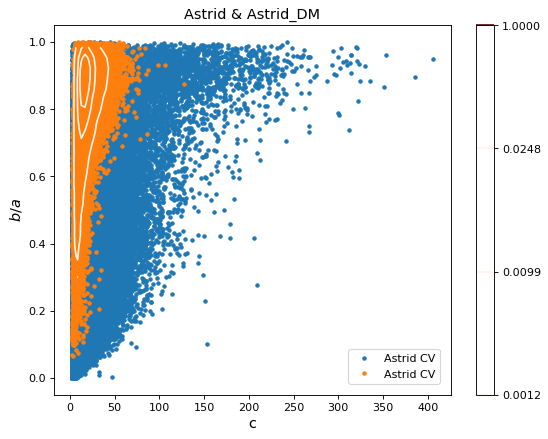

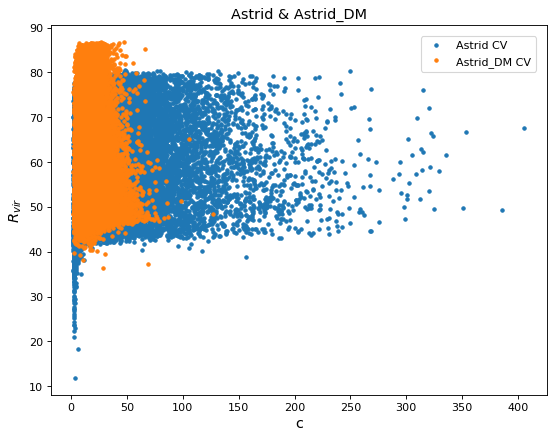

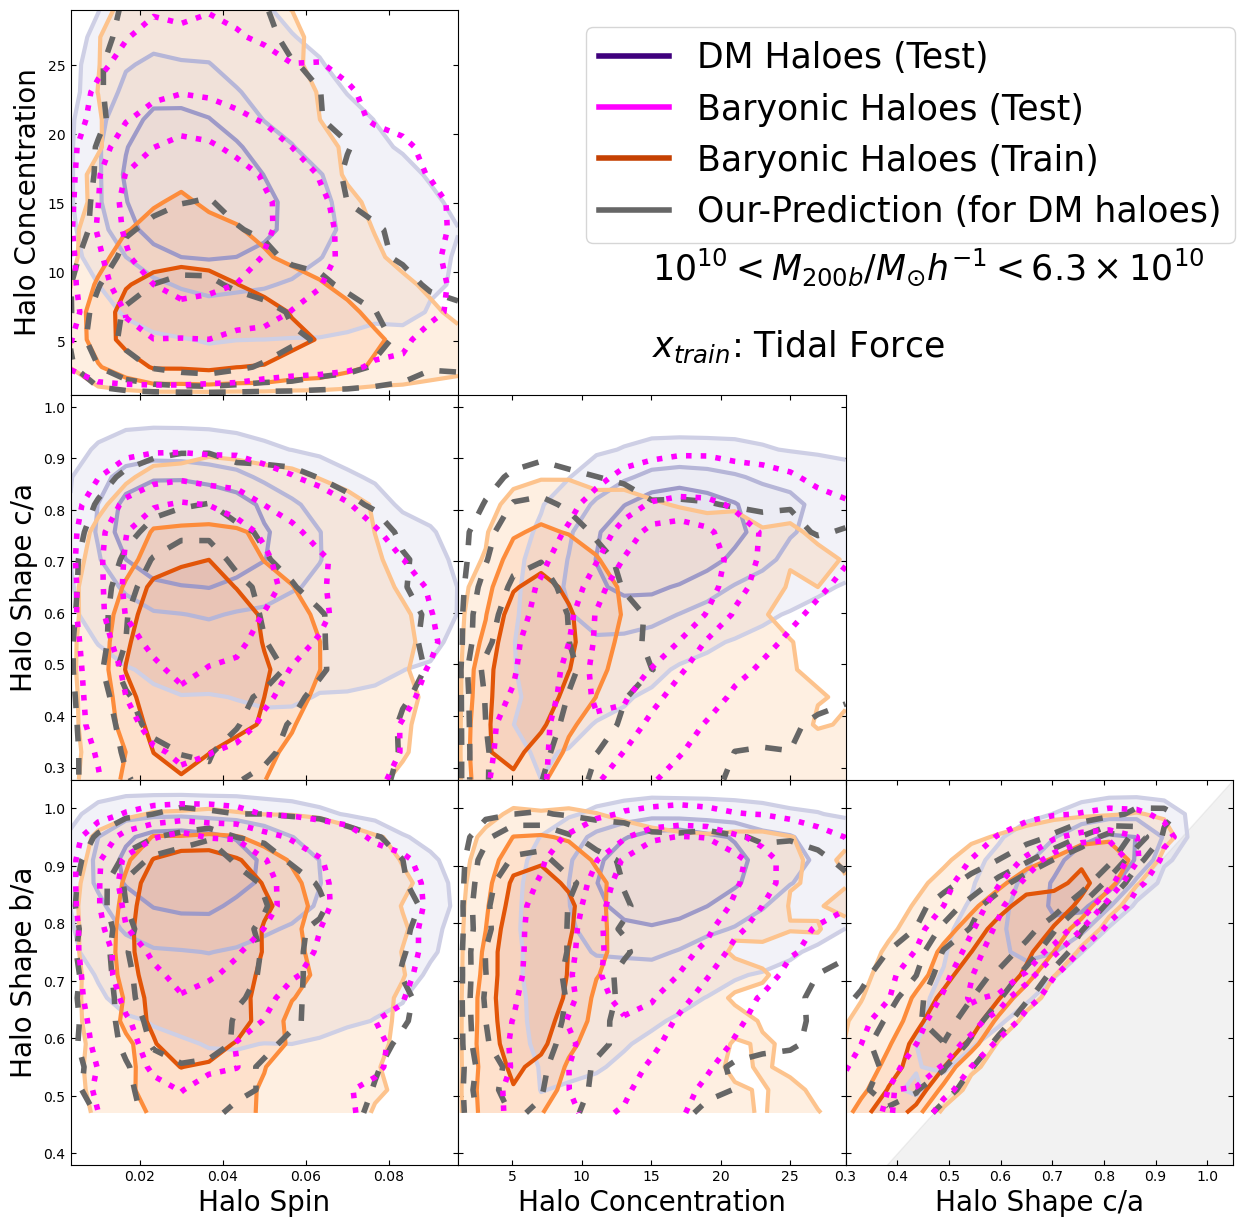

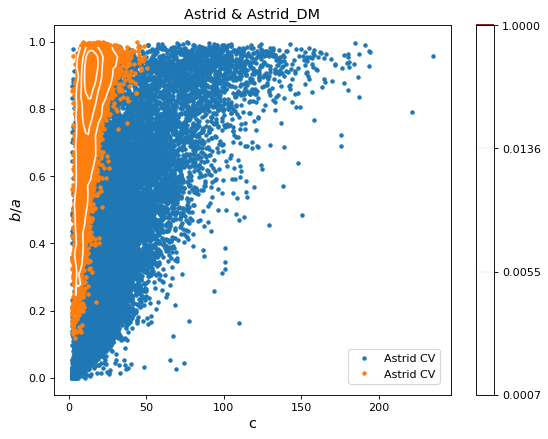

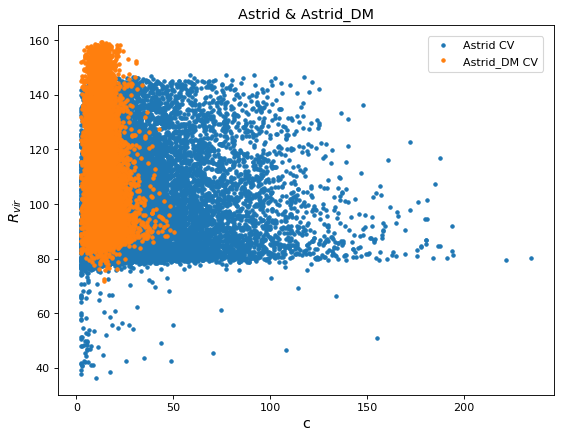

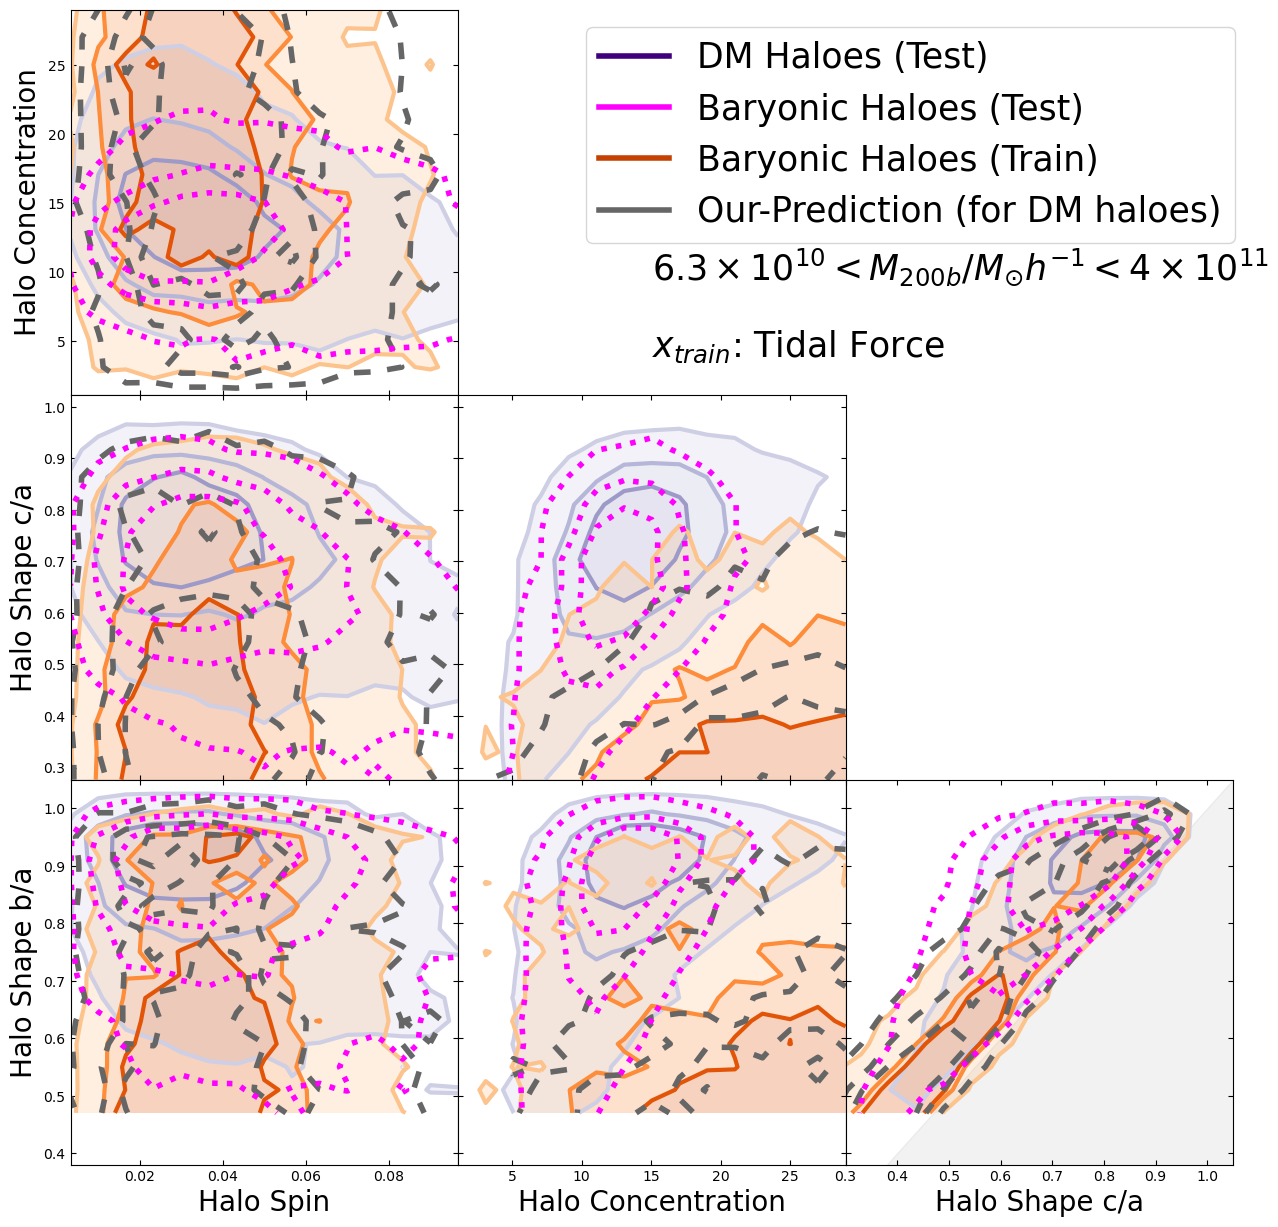

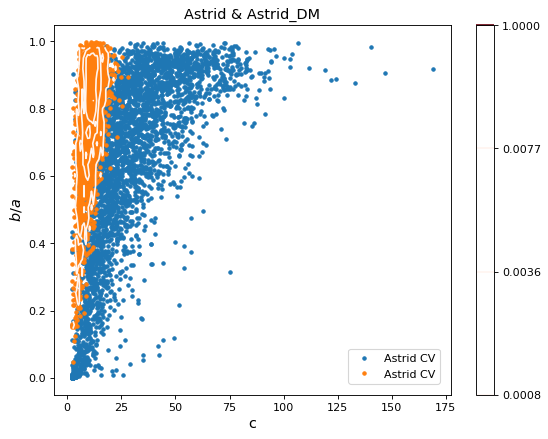

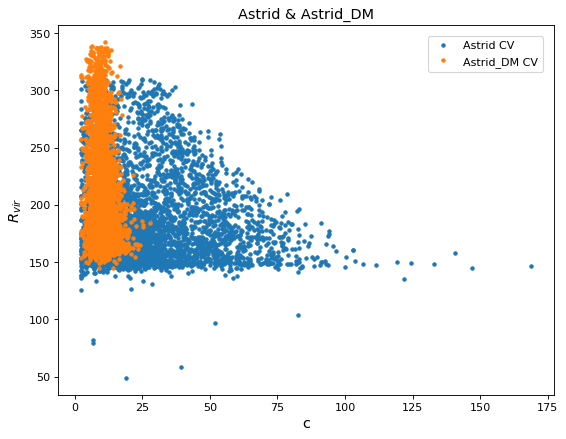

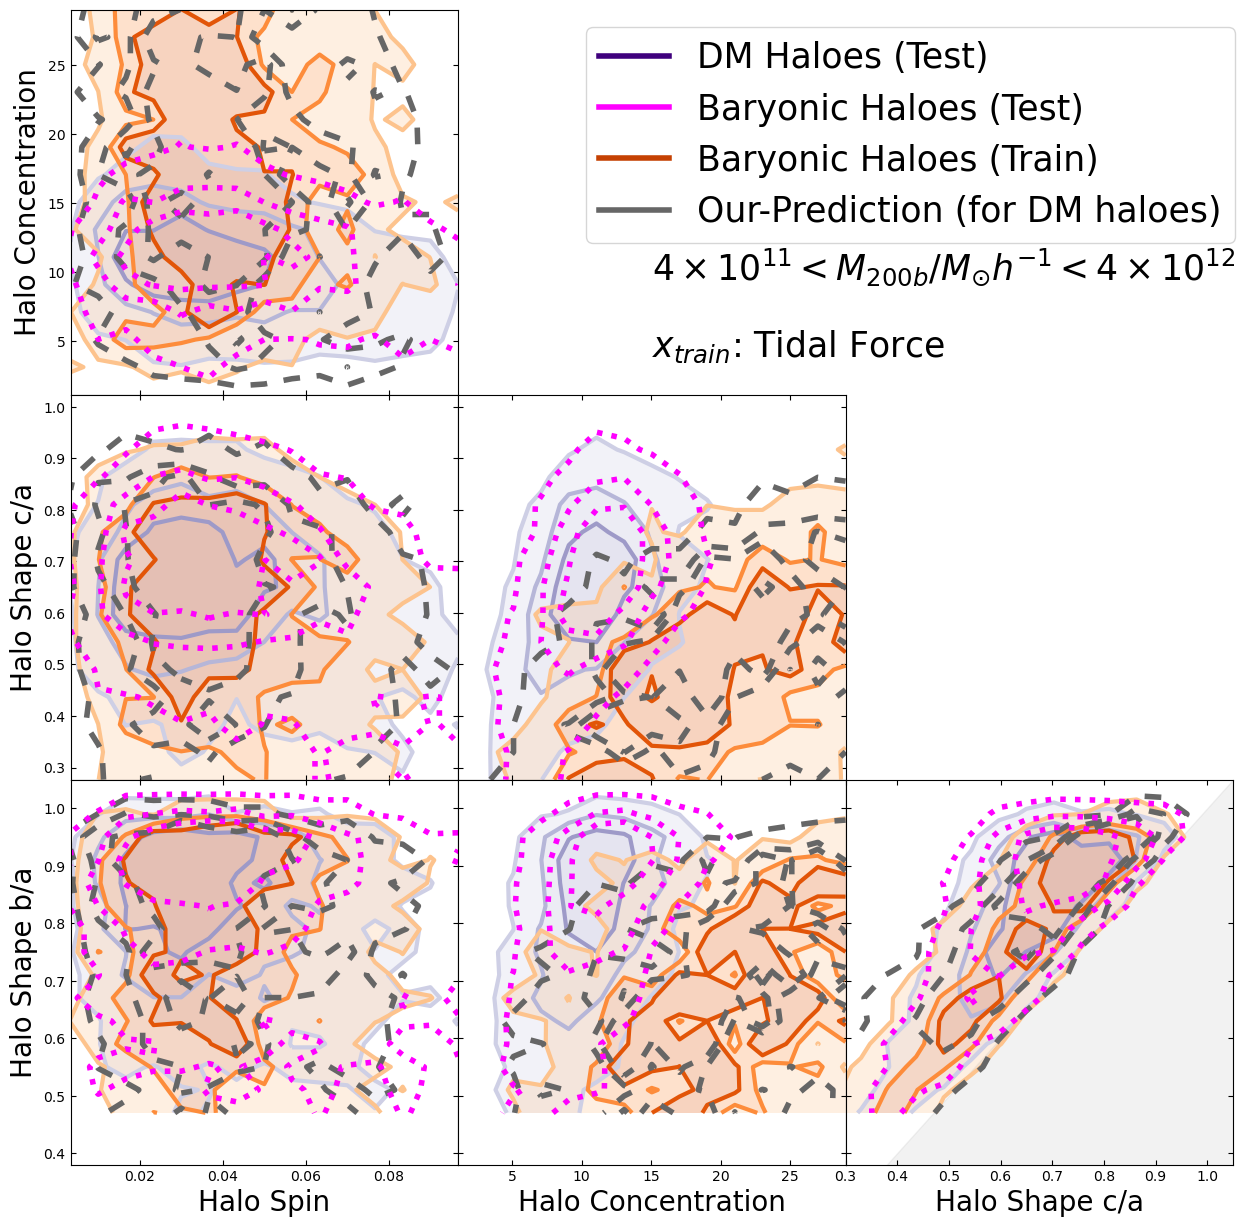

In [97]:
train_dataset_bar = SIMBA_data_bar
train_dataset_dm  = SIMBA_data_dm

train_dataset_bar = SIMBA_data_bar
train_dataset_dm  = SIMBA_data_dm

nbins = 3
bins = np.arange(nbins)
for i in bins:
    print(i,'Mass range:',"%.4g"% 10**bins_M_bar[i],"%.4g"% 10**bins_M_bar[i+1])


    halos_bar = train_dataset_bar[(np.log10(train_dataset_bar.M200b) >= bins_M_bar[i]) & (np.log10(train_dataset_bar.M200b) < bins_M_bar[i+1]) & (train_dataset_bar.pid == -1)
                              & (train_dataset_bar.T_U < 1000)]
    halos_dm = train_dataset_dm[(np.log10(train_dataset_dm.M200b02d) >= bins_M_bar[i]) & (np.log10(train_dataset_dm.M200b02d) < bins_M_bar[i+1]) & (train_dataset_dm.pid == -1)
                            & (train_dataset_dm.T_U < 1000)]



    halos_bar_test = Astrid_data_bar[(np.log10(Astrid_data_bar.M200b) >= bins_M_bar[i]) & (np.log10(Astrid_data_bar.M200b) < bins_M_bar[i+1]) & (Astrid_data_bar.pid == -1)
                                    & (Astrid_data_bar.T_U < 1000)]
    halos_dm_test = train_dataset_dm[(np.log10(train_dataset_dm.M200b02d) >= bins_M_bar[i]) & (np.log10(train_dataset_dm.M200b02d) < bins_M_bar[i+1]) & (train_dataset_dm.pid == -1)
                              & (train_dataset_dm.T_U < 1000)]

    print('# halos bar:',len(halos_bar),'# halos dm:',len(halos_dm))
    
    cg = ConditionalMultiVariateGaussian()
    x_train = np.asarray(halos_bar[['TidalForce']]) #np.random.randn(100000,2) ## this could be 100000 baryonified haloes with 2 input properties
    y_train = np.asarray(halos_bar[['cv','Spin','ca','ba']]) #np.random.randn(100000,3) ## this could be 100000 baryonified haloes with 3 output properties
    #x_test  = np.asarray(halos_dm_test[['TidalForce']]) #np.random.randn(20000,2)   ## this could be 20000 dm haloes with 2 input properties
    x_test = np.random.uniform(np.min(halos_dm_test[['TidalForce']]), np.max(halos_dm_test[['TidalForce']]), len(halos_dm_test[['TidalForce']])).reshape(len(halos_dm_test[['TidalForce']]),1)

    print (x_train.shape)
    print (y_train.shape)
    cg.fit(x_train,y_train)
    y_pred = cg.predict(x_test)
    print(y_pred.shape)
    valy1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=30, density = False)
    edgex = am(edge1)
    edgey = am(edge2)
    pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

    plt.plot(halos_bar.cv, halos_bar.ba,'.',label = "Astrid CV")
    plt.plot(halos_dm.cv, halos_dm.ba,'.',label = "Astrid CV")

    lvl = confidence_intervals(valy1.T/valy1.sum())
    plt.contour(edgex, edgey,valy1.T/valy1.sum(),levels=lvl,cmap='Reds')
    plt.colorbar()

    plt.title('Astrid & Astrid_DM', fontsize = 13)
    plt.legend(loc = 0, borderaxespad = 1.)
    plt.xlabel('c', fontsize=13)
    plt.ylabel(r'$b/a$', fontsize=13)
    pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

    plt.plot(halos_bar.cv, halos_bar.Rvir,'.',label = "Astrid CV")
    plt.plot(halos_dm.cv, halos_dm.Rvir,'.',label = "Astrid_DM CV")

    plt.title('Astrid & Astrid_DM', fontsize = 13)
    plt.legend(loc = 0, borderaxespad = 1.)
    plt.xlabel('c', fontsize=13)
    plt.ylabel(r'$R_{vir}$', fontsize=13)
    bins = 15
    
    ##spin vs conc
    ca_range   = [0.25, 1.05]
    conc_range = [0.1, 30]
    ba_range   = [0.45, 1.05]
    spin_range = [0, 0.1]
    rvir_range = [120, 200]
    density    = False
    valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.cv, bins=bins, range = [ spin_range,conc_range],density=density)
    valx1,edge1,edge2 = np.histogram2d(halos_dm_test.Spin, halos_dm_test.cv, bins=bins, range = [ spin_range,conc_range],density=density)
    valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,0], bins=bins, range = [ spin_range,conc_range],density=density)
    valp2,edge1,edge2 = np.histogram2d(halos_bar_test.Spin, halos_bar_test.cv, bins=bins, range = [ spin_range,conc_range],density=density)
    edgex = am(edge1)
    edgey = am(edge2)

    ## vs c/a
    _2valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.ca, bins=bins, range = [ spin_range,ca_range],density=density)
    _2valx1,edge1,edge2 = np.histogram2d(halos_dm_test.Spin, halos_dm_test.ca, bins=bins, range = [ spin_range,ca_range],density=density)
    _2valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,2], bins=bins, range = [ spin_range,ca_range],density=density)
    _2valp2,edge1,edge2 = np.histogram2d(halos_bar_test.Spin, halos_bar_test.ca, bins=bins, range = [ spin_range,ca_range],density=density)
    _2edgex = am(edge1)
    _2edgey = am(edge2)
    #%


    _3valy1,edge1,edge2 = np.histogram2d(halos_bar.Spin, halos_bar.ba, bins=bins, range = [ spin_range,ba_range],density=density)
    _3valx1,edge1,edge2 = np.histogram2d(halos_dm_test.Spin, halos_dm_test.ba, bins=bins, range = [ spin_range,ba_range],density=density)
    _3valp1,edge1,edge2 = np.histogram2d(y_pred[:,1], y_pred[:,3], bins=bins, range = [ spin_range,ba_range],density=density)
    _3valp2,edge1,edge2 = np.histogram2d(halos_bar_test.Spin, halos_bar_test.ba, bins=bins, range = [ spin_range,ba_range],density=density)
    _3edgex = am(edge1)
    _3edgey = am(edge2)

    ## halo concentration vs c/a
    _4valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ca, bins=bins, range = [ conc_range,ca_range],density=density)
    _4valx1,edge1,edge2 = np.histogram2d(halos_dm_test.cv, halos_dm_test.ca, bins=bins, range = [ conc_range,ca_range],density=density)
    _4valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,2], bins=bins, range = [ conc_range,ca_range],density=density)
    _4valp2,edge1,edge2 = np.histogram2d(halos_bar_test.cv, halos_bar_test.ca, bins=bins, range = [ conc_range,ca_range],density=density)
    _4edgex = am(edge1)
    _4edgey = am(edge2)

    ## halo concentration vs b/a
    _5valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ba, bins=bins, range = [ conc_range,ba_range],density=density)
    _5valx1,edge1,edge2 = np.histogram2d(halos_dm_test.cv, halos_dm_test.ba, bins=bins, range = [ conc_range,ba_range],density=density)
    _5valp1,edge1,edge2 = np.histogram2d(y_pred[:,0], y_pred[:,3], bins=bins, range = [ conc_range,ba_range],density=density)
    _5valp2,edge1,edge2 = np.histogram2d(halos_bar_test.cv, halos_bar_test.ba, bins=bins, range = [ conc_range,ba_range],density=density)
    _5edgex = am(edge1)
    _5edgey = am(edge2)

    ## ca vs b/a
    _6valy1,edge1,edge2 = np.histogram2d(halos_bar.ca, halos_bar.ba, bins=bins, range = [ ca_range,ba_range],density=density)
    _6valx1,edge1,edge2 = np.histogram2d(halos_dm_test.ca, halos_dm_test.ba, bins=bins, range = [ ca_range,ba_range],density=density)
    _6valp1,edge1,edge2 = np.histogram2d(y_pred[:,2], y_pred[:,3], bins=bins, range = [ ca_range,ba_range],density=density)
    _6valp2,edge1,edge2 = np.histogram2d(halos_bar_test.ca, halos_bar_test.ba, bins=bins, range = [ ca_range,ba_range],density=density)

    _6edgex = am(edge1)
    _6edgey = am(edge2)

    cmap = matplotlib.cm.get_cmap('Purples')
    colorp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(1.0)]
    colorpp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(0.9)]
    cmap = matplotlib.cm.get_cmap('binary')
    colorb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
    cmap = matplotlib.cm.get_cmap('Oranges')
    coloro = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.8)]
    coloroo = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.89)]

    
    ######################
    t = time.time()

    lvl = [0.0014,0.0028,0.0035,1]
    lvl = 3
    lvl = [0.0014,0.0028,0.01]

    vmax = 0.008
    vmaxcont = 0.005

    fig,axs  = plt.subplots(3,3,figsize=(15,15),gridspec_kw={ 'wspace':0,'hspace': 0},sharex='col',sharey='row')
    axs[0, 2].axis('off')
    axs[0, 1].axis('off')
    axs[1, 2].set_visible(False)

    ax = axs[0,0]
    h1,h2,h3 = easyplot(valx1,valy1,valp1,edgex,edgey)
    axs[0,0].yaxis.set_ticks_position('both')
    axs[0,0].tick_params(axis='x', direction='in')
    axs[0,0].tick_params(axis='y', direction='in')
    axs[0,0].xaxis.set_ticks_position('both')
    axs[0,0].set_ylabel('Halo Concentration',fontsize=20)
    if i ==0:
        axs[0,0].text(1.5,0.3, '$ 10^{10} < M_{200b}/M_{\odot}h^{-1} < 6.3 \\times 10^{10}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==1:
        axs[0,0].text(1.5,0.3, '$6.3 \\times 10^{10} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{11}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==2:
        axs[0,0].text(1.5,0.3, '$4 \\times 10^{11} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{12}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)

    if i ==3:
        axs[0,0].text(1.5,0.3, '$4 \\times 10^{12} < M_{200b}/M_{\odot}h^{-1} < 4 \\times 10^{14}$', transform = axs[0,0].transAxes, fontsize = 25)
        axs[0,0].text(1.5,0.1, '$x_{train}$: Tidal Force', transform = axs[0,0].transAxes, fontsize = 25)
          
    if h3 is not None:
        #axs[0,0].legend([h1[-2], h2[-2],h3[-2]], ['DM Haloes (Test)', 'Baryonic Haloes (Test)', 'Baryonic Haloes (Train)','Our-Prediction (for DM haloes)'],fontsize=25,bbox_to_anchor=(3.05, 1))
        axs[0,0].legend([line0,line1,line2,line3], ['DM Haloes (Test)', 'Baryonic Haloes (Test)', 'Baryonic Haloes (Train)','Our-Prediction (for DM haloes)'],fontsize=25,bbox_to_anchor=(3.05, 1))
    else:
        axs[0,0].legend([h1[-2], h2[-2]], ['DM Haloes', 'Baryonic Haloes'],fontsize=25,bbox_to_anchor=(3.05, 1))
        axs[0,0].text(2,0.5, '$2 \\times 10^{11} < M_{200}/M_{\odot}h^{-1} < 10^{12}$', transform = axs[0,0].transAxes, fontsize = 25)
    
    lvl = confidence_intervals(valp2.T/valp2.sum())
    axs[0,0].contour(edgex,edgey,valp2.T/valp2.sum(),levels=lvl,colors='magenta',linewidths=4,linestyles=':')
    #h3,l3 = CS.legend_elements()
    #for c in CS.collections:
    #    c.set_dashes([(1,(3.0,3.0))])
        
    axs[1,0].set_ylabel('Halo Shape c/a',fontsize=20)
    ax = axs[1,0]
    easyplot(_2valx1,_2valy1,_2valp1,_2edgex,_2edgey)
    lvl = confidence_intervals(_2valp2.T/_2valp2.sum())
    axs[1,0].contour(_2edgex,_2edgey,_2valp2.T/_2valp2.sum(),levels=lvl,colors='magenta',linewidths=4,linestyles=':')
    axs[1,0].yaxis.set_ticks_position('both')
    axs[1,0].tick_params(axis='x', direction='in')
    axs[1,0].tick_params(axis='y', direction='in')
    axs[1,0].xaxis.set_ticks_position('both')
    
    ax = axs[2,0]
    easyplot(_3valx1,_3valy1,_3valp1,_3edgex,_3edgey)
    lvl = confidence_intervals(_3valp2.T/_3valp2.sum())
    axs[2,0].contour(_3edgex,_3edgey,_3valp2.T/_3valp2.sum(),levels=lvl,colors='magenta',linewidths=4,linestyles=':')    
    axs[2,0].set_ylabel('Halo Shape b/a',fontsize=20)
    axs[2,0].yaxis.set_ticks_position('both')
    axs[2,0].tick_params(axis='x', direction='in')
    axs[2,0].tick_params(axis='y', direction='in')
    axs[2,0].xaxis.set_ticks_position('both')
    axs[2,0].set_xlabel('Halo Spin',fontsize=20)


    ## halo conc vs c/a
    ax = axs[1,1]
    easyplot(_4valx1,_4valy1,_4valp1,_4edgex,_4edgey)
    lvl = confidence_intervals(_4valp2.T/_4valp2.sum())
    axs[1,1].contour(_4edgex,_4edgey,_4valp2.T/_4valp2.sum(),levels=lvl,colors='magenta',linewidths=4,linestyles=':')
    axs[1,1].yaxis.set_ticks_position('both')
    axs[1,1].tick_params(axis='x', direction='in')
    axs[1,1].tick_params(axis='y', direction='in')
    axs[1,1].xaxis.set_ticks_position('both')


    ## halo conc vs b/a
    axs[2,1].yaxis.set_ticks_position('both')
    axs[2,1].tick_params(axis='x', direction='in')
    axs[2,1].tick_params(axis='y', direction='in')
    axs[2,1].xaxis.set_ticks_position('both')
    axs[2, 1].set_xlabel('Halo Concentration',fontsize=20)
    ax = axs[2,1]
    easyplot(_5valx1,_5valy1,_5valp1,_5edgex,_5edgey)
    lvl = confidence_intervals(_5valp2.T/_5valp2.sum())
    axs[2,1].contour(_5edgex,_5edgey,_5valp2.T/_5valp2.sum(),levels=lvl,colors='magenta',linewidths=4,linestyles=':')


    ## halo conc vs b/a
    axs[2,2].yaxis.set_ticks_position('both')
    axs[2,2].tick_params(axis='x', direction='in')
    axs[2,2].tick_params(axis='y', direction='in')
    axs[2,2].xaxis.set_ticks_position('both')
    ax = axs[2,2]
    x = np.linspace(0, 1.1, 4)
    y = x
    plt.fill_between(x, y, where=(x > 0), color='grey', alpha=0.1)
    ax.set_xlim([0.3,1.05])
    ax.set_ylim([0.38,1.05])

    easyplot(_6valx1,_6valy1,_6valp1,_6edgex,_6edgey)
    lvl = confidence_intervals(_6valp2.T/_6valp2.sum())
    axs[2,2].contour(_6edgex,_6edgey,_6valp2.T/_6valp2.sum(),levels=lvl,colors='magenta',linewidths=4,linestyles=':')


    axs[2, 2].set_xlabel('Halo Shape c/a',fontsize=20)

    #plt.savefig('graph/Astrid_Random_BarVsDM'+str(i)+'_AllHalos.pdf')
    
    
    #check dm halo concentrations
    #meanHdms = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(halos_dm.M200b02d),statistic='mean', bins=11, range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    #meanHdm = 10**meanHdms[0]
    #cvmdms = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(halos_dm.cv),statistic='median', bins=11,range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    #cvm_dm_sim = 10**cvmdms[0]
    #%cvmdms_pred = stats.binned_statistic(np.log10(halos_dm.M200b02d),np.log10(y_pred[:,0]),statistic='median', bins=11,range=(halos_bar.M200b.min(),halos_bar.M200b.max()))
    #%cvm_dm_pred = 10**cvmdms_pred[0]
    #pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')
    #plt.plot(meanHdm, cvm_dm_sim,'-',label = "simulations")
    #plt.plot(meanHdm, cvm_dm_pred,'-',label = "our-prediction")

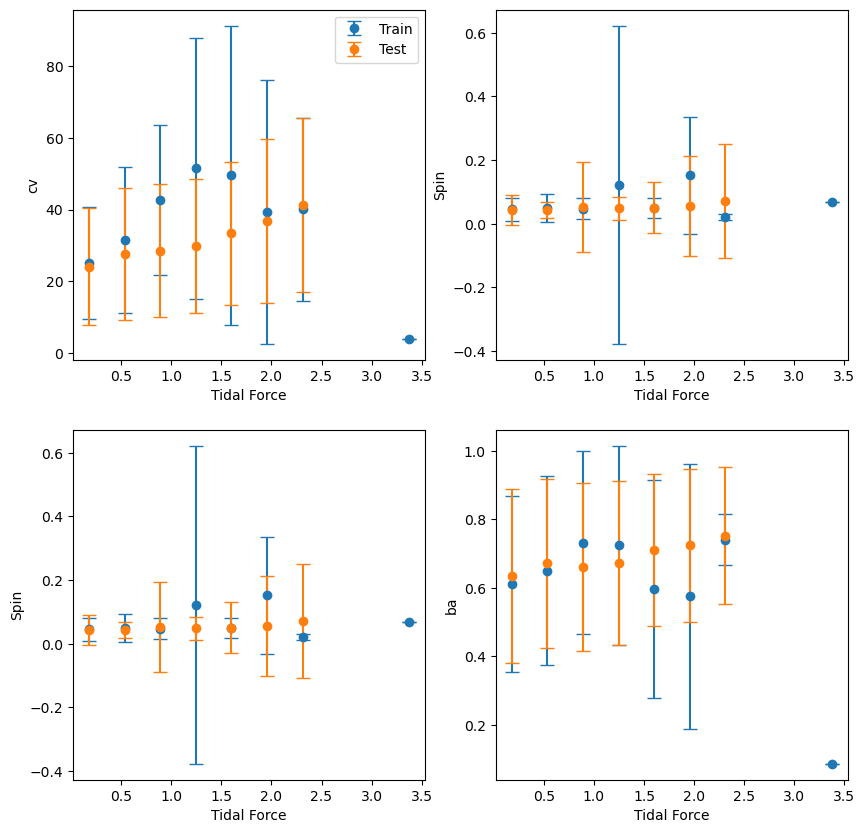

In [99]:
n_bins = 10
bins = np.linspace(min(x_train[:,0]), max(x_train[:,0]), n_bins + 1)  # 20 equal bins

fig,ax = plt.subplots(2,2, figsize = (10,10))

# CV
mean_train, bin_edges, _ = binned_statistic(x_train[:,0], y_train[:,0], statistic='mean', bins=bins)
std_train, _, _ = binned_statistic(x_train[:,0], y_train[:,0], statistic='std', bins=bins)

mean_pred, bin_edges, _ = binned_statistic(x_test[:,0], y_pred[:,0], statistic='mean', bins=bins)
std_pred, _, _ = binned_statistic(x_test[:,0], y_pred[:,0], statistic='std', bins=bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
ax[0,0].errorbar(bin_centers, mean_train, yerr=std_train, fmt='o', capsize=5, label='Train')
ax[0,0].errorbar(bin_centers, mean_pred, yerr=std_pred, fmt='o', capsize=5, label='Test')

ax[0,0].set_ylabel('cv')
ax[0,0].set_xlabel('Tidal Force')

# spin
mean_train, bin_edges, _ = binned_statistic(x_train[:,0], y_train[:,1], statistic='mean', bins=bins)
std_train, _, _ = binned_statistic(x_train[:,0], y_train[:,1], statistic='std', bins=bins)

mean_pred, bin_edges, _ = binned_statistic(x_test[:,0], y_pred[:,1], statistic='mean', bins=bins)
std_pred, _, _ = binned_statistic(x_test[:,0], y_pred[:,1], statistic='std', bins=bins)

ax[1,0].errorbar(bin_centers, mean_train, yerr=std_train, fmt='o', capsize=5, label='Train')
ax[1,0].errorbar(bin_centers, mean_pred, yerr=std_pred, fmt='o', capsize=5, label='Test')

ax[1,0].set_ylabel('Spin')
ax[1,0].set_xlabel('Tidal Force')

# ba
mean_train, bin_edges, _ = binned_statistic(x_train[:,0], y_train[:,3], statistic='mean', bins=bins)
std_train, _, _ = binned_statistic(x_train[:,0], y_train[:,3], statistic='std', bins=bins)

mean_pred, bin_edges, _ = binned_statistic(x_test[:,0], y_pred[:,3], statistic='mean', bins=bins)
std_pred, _, _ = binned_statistic(x_test[:,0], y_pred[:,3], statistic='std', bins=bins)

ax[1,1].errorbar(bin_centers, mean_train, yerr=std_train, fmt='o', capsize=5, label='Train')
ax[1,1].errorbar(bin_centers, mean_pred, yerr=std_pred, fmt='o', capsize=5, label='Test')

ax[1,1].set_ylabel('ba')
ax[1,1].set_xlabel('Tidal Force')

# spin
mean_train, bin_edges, _ = binned_statistic(x_train[:,0], y_train[:,1], statistic='mean', bins=bins)
std_train, _, _ = binned_statistic(x_train[:,0], y_train[:,1], statistic='std', bins=bins)

mean_pred, bin_edges, _ = binned_statistic(x_test[:,0], y_pred[:,1], statistic='mean', bins=bins)
std_pred, _, _ = binned_statistic(x_test[:,0], y_pred[:,1], statistic='std', bins=bins)

ax[0,1].errorbar(bin_centers, mean_train, yerr=std_train, fmt='o', capsize=5, label='Train')
ax[0,1].errorbar(bin_centers, mean_pred, yerr=std_pred, fmt='o', capsize=5, label='Test')

ax[0,1].set_ylabel('Spin')
ax[0,1].set_xlabel('Tidal Force')

ax[0,0].legend()
plt.savefig('Prop_vs_TidalForce_SIMBA_Random.pdf')

0 Mass range: 1e+10 6.31e+10
# halos bar: 66562 # halos dm: 71881
(66562, 1)
(66562, 4)
here
acceptance rate is  89.23774053382992 %
pval (Bar-DM) = 4.348754036397119e-59
pval (Bar-pred) = 0.00010454349646083744
pval (Bar-DM) = 0.43549127415019256
pval (Bar-pred) = 0.01968489887749584
pval (Bar-DM) = 0.0
pval (Bar-pred) = 9.563638255598264e-05
pval (Bar-DM) = 3.335365464719364e-290
pval (Bar-pred) = 4.803302955986661e-13


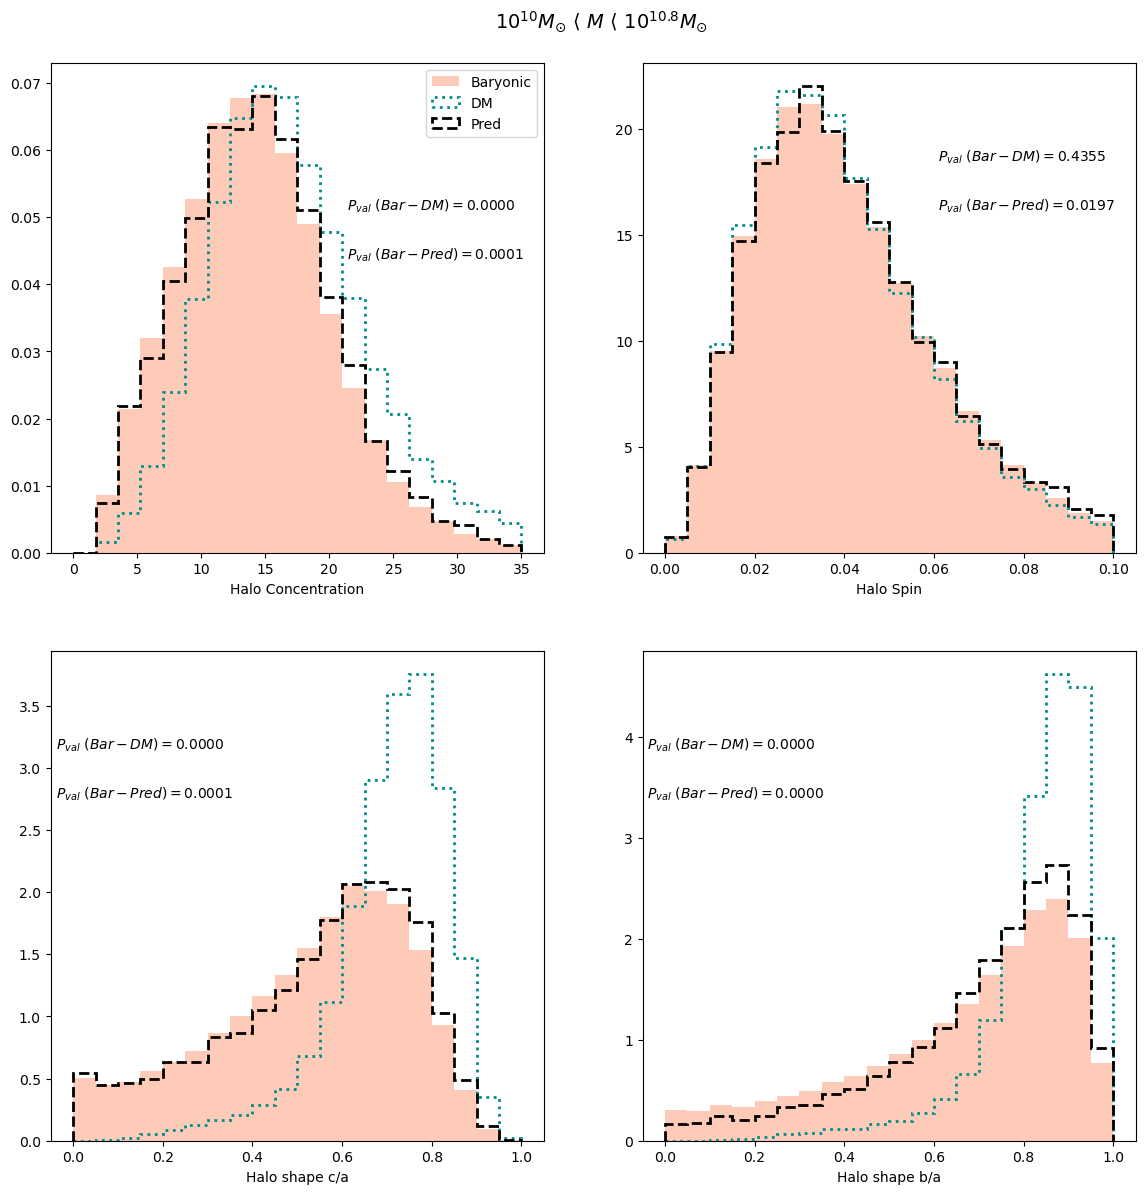

1 Mass range: 6.31e+10 3.981e+11
# halos bar: 15822 # halos dm: 14864
(15822, 1)
(15822, 4)
here
acceptance rate is  90.41362530413626 %
pval (Bar-DM) = 1.4010825338263892e-54
pval (Bar-pred) = 0.014451306980952306
pval (Bar-DM) = 6.937277285594731e-09
pval (Bar-pred) = 0.6272175062405767
pval (Bar-DM) = 4.3664969952170656e-122
pval (Bar-pred) = 0.0003207898529100509
pval (Bar-DM) = 9.885050754258862e-46
pval (Bar-pred) = 3.5365010966850313e-13


<Figure size 640x480 with 0 Axes>

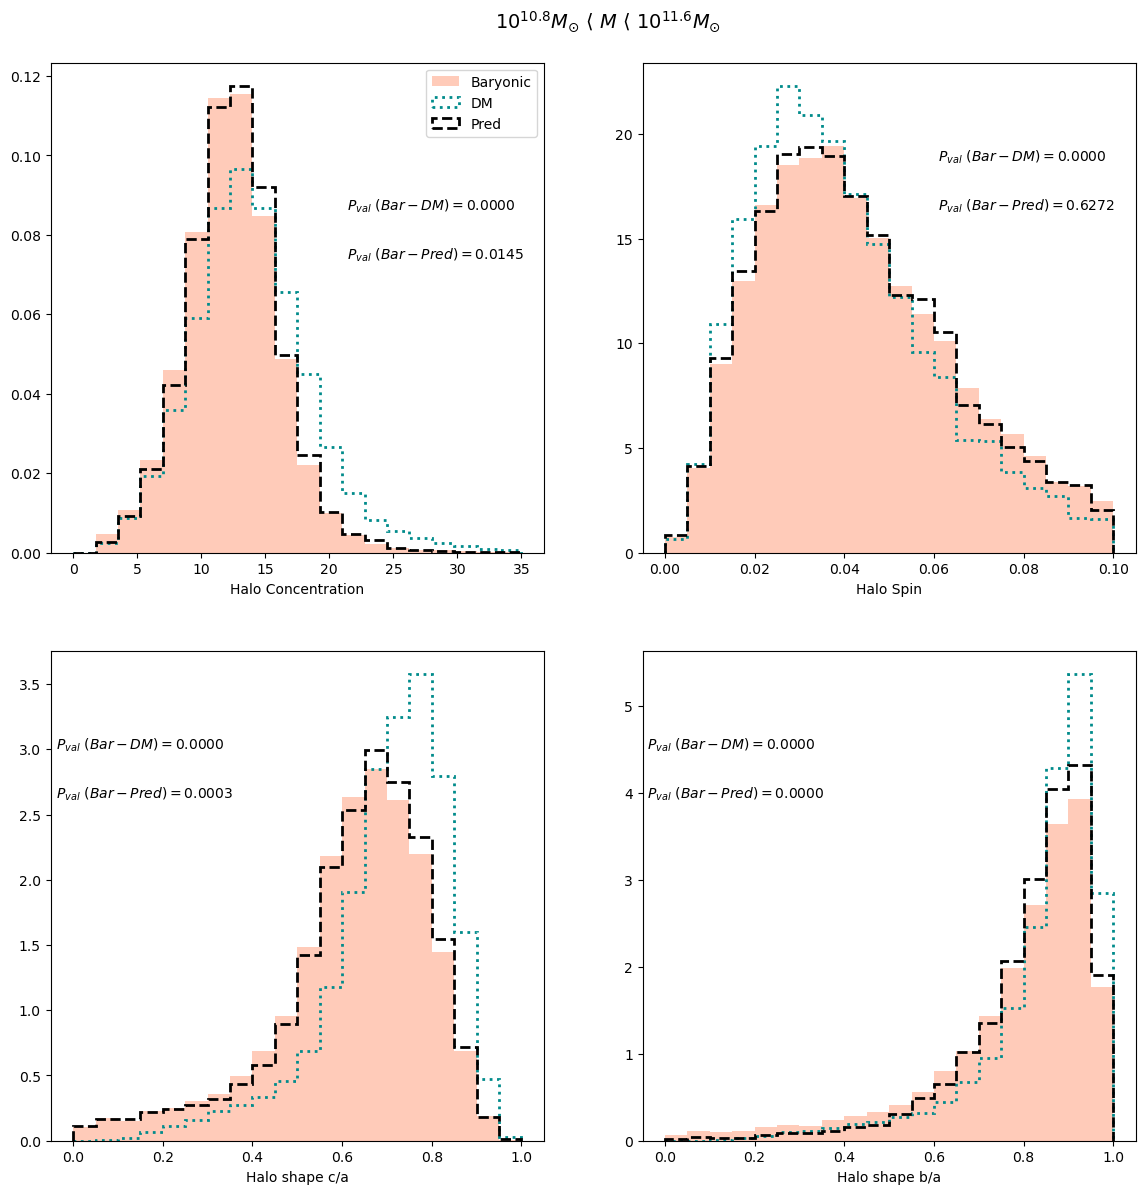

2 Mass range: 3.981e+11 3.981e+12
# halos bar: 3647 # halos dm: 3234
(3647, 1)
(3647, 4)
here
acceptance rate is  90.9704641350211 %
pval (Bar-DM) = 9.710340560622662e-13
pval (Bar-pred) = 0.015145295488243962
pval (Bar-DM) = 2.210666790366506e-12
pval (Bar-pred) = 0.3140239503187137
pval (Bar-DM) = 3.1946767485522377e-11
pval (Bar-pred) = 0.053229261915526356
pval (Bar-DM) = 4.8480075228106625e-25
pval (Bar-pred) = 2.050580991339638e-09


<Figure size 640x480 with 0 Axes>

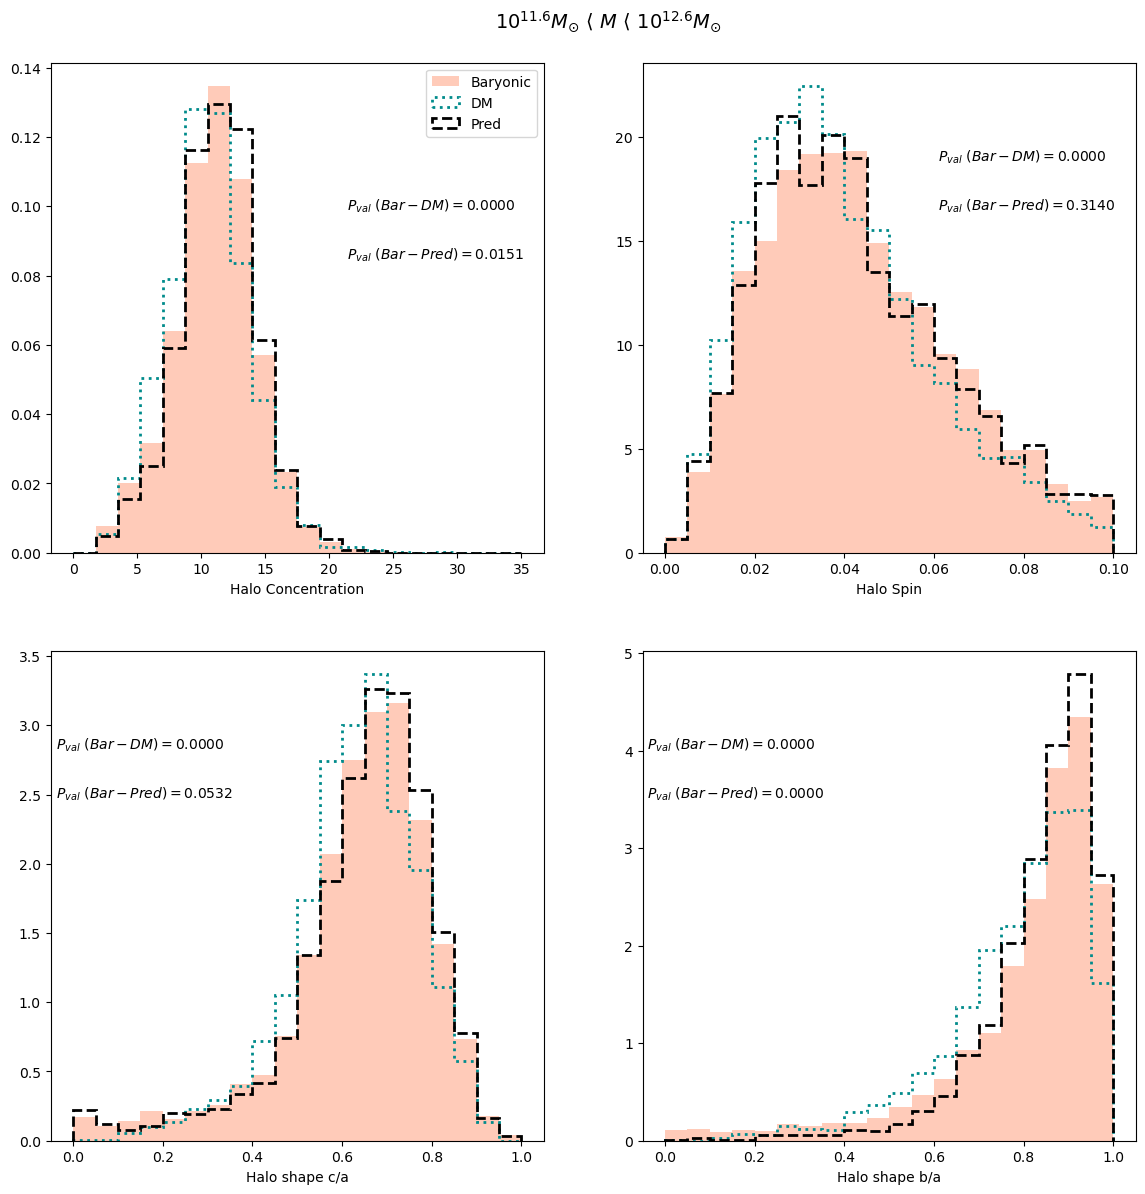

<Figure size 640x480 with 0 Axes>

In [33]:
font1 = {'color':  'red',
        'weight': 'normal',
        'size': 13,
        }
font2 = {'color':  'darkmagenta',
        'weight': 'normal',
        'size': 13,
        }
font3 = {'color':  'darkgreen',
        'weight': 'normal',
        'size': 13,
        }
font4 = {'color':  'black',
        'weight': 'normal',
        'size': 12.5,
        }
nbins = 3
bins = np.arange(nbins)

hist_bins = 20
titles = ['$10^{10} M_{\odot} \ \langle \ M \ \langle \ 10^{10.8} M_{\odot}$',
          '$10^{10.8} M_{\odot} \ \langle \ M \ \langle \ 10^{11.6} M_{\odot}$',
          '$10^{11.6} M_{\odot} \ \langle \ M \ \langle \ 10^{12.6} M_{\odot}$']
for i in bins:
    print(i,'Mass range:',"%.4g"% 10**bins_M_bar[i],"%.4g"% 10**bins_M_bar[i+1])

    halos_bar = train_dataset_bar[(np.log10(train_dataset_bar.M200b) >= bins_M_bar[i]) & (np.log10(train_dataset_bar.M200b) < bins_M_bar[i+1]) & (train_dataset_bar.pid == -1)
                              & (train_dataset_bar.T_U < 1)]
    halos_dm = train_dataset_dm[(np.log10(train_dataset_dm.M200b02d) >= bins_M_bar[i]) & (np.log10(train_dataset_dm.M200b02d) < bins_M_bar[i+1]) & (train_dataset_dm.pid == -1)
                            & (train_dataset_dm.T_U < 1)]



    halos_bar_test = Astrid_data_bar[(np.log10(Astrid_data_bar.M200b) >= bins_M_bar[i]) & (np.log10(Astrid_data_bar.M200b) < bins_M_bar[i+1]) & (Astrid_data_bar.pid == -1)
                                    & (Astrid_data_bar.T_U < 1)]
    halos_dm_test = train_dataset_dm[(np.log10(train_dataset_dm.M200b02d) >= bins_M_bar[i]) & (np.log10(train_dataset_dm.M200b02d) < bins_M_bar[i+1]) & (train_dataset_dm.pid == -1)
                              & (train_dataset_dm.T_U < 1)]
    
    print('# halos bar:',len(halos_bar),'# halos dm:',len(halos_dm))
    
        
    cg = ConditionalMultiVariateGaussian()
    x_train = np.asarray(halos_bar[['TidalForce']]) #np.random.randn(100000,2) ## this could be 100000 baryonified haloes with 2 input properties
    y_train = np.asarray(halos_bar[['cv','Spin','ca','ba']]) #np.random.randn(100000,3) ## this could be 100000 baryonified haloes with 3 output properties
    x_test  = np.asarray(halos_dm_test[['TidalForce']]) #np.random.randn(20000,2)   ## this could be 20000 dm haloes with 2 input properties
    #x_test = np.random.uniform(np.min(halos_dm_test[['TidalForce']]), np.max(halos_dm_test[['TidalForce']]), len(halos_dm_test[['TidalForce']])).reshape(len(halos_dm_test[['TidalForce']]),1)

    print (x_train.shape)
    print (y_train.shape)
    cg.fit(x_train,y_train)
    y_pred = cg.predict(x_test)
    
    fig, ax = plt.subplots(2,2, figsize = (14,14))
    
    # CV
    ax[0,0].hist(halos_bar.cv, color = 'coral', lw = 2, bins = hist_bins, range = (0,35), alpha = 0.4, label = 'Baryonic', density = True)
    ax[0,0].hist(halos_dm.cv, histtype = 'step', color = 'darkcyan', lw = 2, bins = hist_bins, range = (0,35), ls = ':', label = 'DM', density = True)
    ax[0,0].hist(y_pred[:,0], histtype = 'step', color = 'black', lw = 2, bins = hist_bins, range = (0,35), ls = '--', label = 'Pred', density = True)

    if len(halos_bar) > 5000: 
        ind_bar = np.random.choice(len(halos_bar), 5000, replace = False)
    else: ind_bar = np.arange(len(halos_bar))
    if len(halos_dm) > 5000: ind_dm = np.random.choice(len(halos_dm), 5000, replace = False)
    else: ind_dm = np.arange(len(halos_dm))
    
    ks = ks_2samp(halos_bar.iloc[ind_bar].cv, halos_dm.iloc[ind_dm].cv)[1]
    print('pval (Bar-DM) = ' + str(ks))
    ax[0,0].text(0.6,0.7, '$P_{val}\ (Bar-DM)=$' + '{:.4f}'.format(ks), transform = ax[0,0].transAxes)
    ks = ks_2samp(halos_bar.iloc[ind_bar].cv, y_pred[ind_dm,0])[1]
    print('pval (Bar-pred) = ' + str(ks))
    ax[0,0].text(0.6,0.6, '$P_{val}\ (Bar-Pred)=$' + '{:.4f}'.format(ks), transform = ax[0,0].transAxes)

    ax[0,0].set_xlabel('Halo Concentration')
    ax[0,0].legend()
    ax[0,0].text(0.9,1.07, titles[i], transform = ax[0,0].transAxes, fontsize = 14)
    
    # Spin
    ax[0,1].hist(halos_bar.Spin, color = 'coral', lw = 2, bins = hist_bins, range = (0,0.1), alpha = 0.4, label = 'Baryonic', density = True)
    ax[0,1].hist(halos_dm.Spin, histtype = 'step', color = 'darkcyan', lw = 2, bins = hist_bins, range = (0,0.1), ls = ':', label = 'DM', density = True)
    ax[0,1].hist(y_pred[:,1], histtype = 'step', color = 'black', lw = 2, bins = hist_bins, range = (0,0.1), ls = '--', label = 'Pred', density = True)

    ks = ks_2samp(halos_bar.iloc[ind_bar].Spin, halos_dm.iloc[ind_dm].Spin)[1]
    print('pval (Bar-DM) = ' + str(ks))
    ax[0,1].text(0.6,0.8, '$P_{val}\ (Bar-DM)=$' + '{:.4f}'.format(ks), transform = ax[0,1].transAxes)
    ks = ks_2samp(halos_bar.iloc[ind_bar].Spin, y_pred[ind_dm,1])[1]
    print('pval (Bar-pred) = ' + str(ks))
    ax[0,1].text(0.6,0.7, '$P_{val}\ (Bar-Pred)=$' + '{:.4f}'.format(ks), transform = ax[0,1].transAxes)

    ax[0,1].set_xlabel('Halo Spin')
    
    # Ca
    ax[1,0].hist(halos_bar.ca, color = 'coral', lw = 2, bins = hist_bins, range = (0,1), alpha = 0.4, label = 'Baryonic', density = True)
    ax[1,0].hist(halos_dm.ca, histtype = 'step', color = 'darkcyan', lw = 2, bins = hist_bins, range = (0,1), ls = ':', label = 'DM', density = True)
    ax[1,0].hist(y_pred[:,2], histtype = 'step', color = 'black', lw = 2, bins = hist_bins, range = (0,1), ls = '--', label = 'Pred', density = True)

    ks = ks_2samp(halos_bar.iloc[ind_bar].ca, halos_dm.iloc[ind_dm].ca)[1]
    print('pval (Bar-DM) = ' + str(ks))
    ax[1,0].text(0.01,0.8, '$P_{val}\ (Bar-DM)=$' + '{:.4f}'.format(ks), transform = ax[1,0].transAxes)
    ks = ks_2samp(halos_bar.iloc[ind_bar].ca, y_pred[ind_dm,2])[1]
    print('pval (Bar-pred) = ' + str(ks))
    ax[1,0].text(0.01,0.7, '$P_{val}\ (Bar-Pred)=$' + '{:.4f}'.format(ks), transform = ax[1,0].transAxes)

    ax[1,0].set_xlabel('Halo shape c/a')
    
    # CV
    ax[1,1].hist(halos_bar.ba, color = 'coral', lw = 2, bins = hist_bins, range = (0,1), alpha = 0.4, label = 'Baryonic', density = True)
    ax[1,1].hist(halos_dm.ba, histtype = 'step', color = 'darkcyan', lw = 2, bins = hist_bins, range = (0,1), ls = ':', label = 'DM', density = True)
    ax[1,1].hist(y_pred[:,3], histtype = 'step', color = 'black', lw = 2, bins = hist_bins, range = (0,1), ls = '--', label = 'Pred', density = True)

    ks = ks_2samp(halos_bar.iloc[ind_bar].ba, halos_dm.iloc[ind_dm].ba)[1]
    print('pval (Bar-DM) = ' + str(ks))
    ax[1,1].text(0.01,0.8, '$P_{val}\ (Bar-DM)=$' + '{:.4f}'.format(ks), transform = ax[1,1].transAxes)
    ks = ks_2samp(halos_bar.iloc[ind_bar].ba, y_pred[ind_dm,3])[1]
    print('pval (Bar-pred) = ' + str(ks))
    ax[1,1].text(0.01,0.7, '$P_{val}\ (Bar-Pred)=$' + '{:.4f}'.format(ks), transform = ax[1,1].transAxes)

    ax[1,1].set_xlabel('Halo shape b/a')
    
    #plt.savefig('graph/Astrid_Random_1d_distributions_' + str(i) + '_AllHalos.pdf')
    plt.show()
    plt.clf()